In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from root_pandas import read_root
from matplotlib import gridspec
from scipy import stats,signal
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from textwrap import wrap
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

from PlottingScripts import CV, Spline, Tune1, distVar, distplot_wratio, StackedHisto, SimpleHisto, mcplot, DrawMatrix

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.22/02


In [2]:
datafolder = '../../rootFiles/1mu1p_selection'
auxfolder = '../aux'
tag = '2021-01-21'
plotfolder = '../outputs/PlotDumps'+tag
covfolder = '../outputs/covMatrix'+tag
covtag = 'frac_covar_run3_%s'%tag



RSE  = ['run','subrun','event']

# RUN 3 

In [48]:
run = 'run3'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYAtt','LYRayleigh','SCE','wiremodThetaYZ','wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

a_df_sys = []

RSE = ['run','subrun','event']
i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
#    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


total 124884, cv = 106578 dv = 18306
total 125115, cv = 106578 dv = 18537
total 18120, cv = 8753 dv = 9367
total 123356, cv = 106578 dv = 16778
total 123293, cv = 106578 dv = 16715
total 124936, cv = 106578 dv = 18358
total 17797, cv = 8753 dv = 9044
total 124406, cv = 106578 dv = 17828
total 124251, cv = 106578 dv = 17673


In [4]:
# Make big list of variables with their accompanying ranges so we can just dump a buttload of plots
#varlistSel = {}

varListSel = {}
varListSel['Xreco'] = distVar('Xreco',(15,241.25),'Reco Vertex X',datafolder+'/'+covfolder+'/'+covtag+'__x_reco.txt')
varListSel['Yreco'] = distVar('Yreco',(-101.5,101.5),'Reco Vertex Y',datafolder+'/'+covfolder+'/'+covtag+'__y_reco.txt')
varListSel['Zreco'] = distVar('Zreco',(15,1021.8),'Reco Vertex Z',datafolder+'/'+covfolder+'/'+covtag+'__z_reco.txt')
varListSel['OpenAng'] = distVar('OpenAng',(.6,2.8),'Opening Angle (rads)',datafolder+'/'+covfolder+'/'+covtag+'__openang_reco.txt')
varListSel['Thetas'] = distVar('Thetas',(0,np.pi),r'Sum of Thetas ($\theta_{p} + \theta_{\mu}$) (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_thetas_reco.txt')
varListSel['Phis'] = distVar('Phis',(1.5,4),r'Difference of Phis ($|\phi_{p} - \phi_{\mu}|$)  (rads)',datafolder+'/'+covfolder+'/'+covtag+'__sum_phis_reco.txt')
varListSel['ChargeNearTrunk'] = distVar('ChargeNearTrunk',(0,600),'ADC Charge within 5cm of Reco Vertex',datafolder+'/'+covfolder+'/'+covtag+'__charge_near_trunk_reco.txt')
varListSel['Enu_1m1p'] = distVar('Enu_1m1p',(200,1200),'Reconstructed Neutrino Energy (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__nu_energy_reco.txt')
varListSel['PhiT_1m1p'] = distVar('PhiT_1m1p',(0,1),r'$\phi_T$',datafolder+'/'+covfolder+'/'+covtag+'__phiT_reco.txt')
varListSel['AlphaT_1m1p'] = distVar('AlphaT_1m1p',(0,np.pi),r'$\alpha_T$',datafolder+'/'+covfolder+'/'+covtag+'__alphaT_reco.txt')
varListSel['PT_1m1p'] = distVar('PT_1m1p',(0,320),r'$p_T$',datafolder+'/'+covfolder+'/'+covtag+'__pT_reco.txt')
varListSel['PTRat_1m1p'] = distVar('PTRat_1m1p',(0,.4),r'$p_T/|p|$',datafolder+'/'+covfolder+'/'+covtag+'__pT_ratio_reco.txt')
varListSel['BjXB_1m1p'] = distVar('BjXB_1m1p',(.2,1.8),'Bjorken X*',datafolder+'/'+covfolder+'/'+covtag+'__BjxB_reco.txt')
varListSel['BjYB_1m1p'] = distVar('BjYB_1m1p',(0.05,.75),'Bjorken Y*',datafolder+'/'+covfolder+'/'+covtag+'__BjyB_reco.txt')
varListSel['Q2_1m1p'] = distVar('Q2_1m1p',(0,6e5),r'$Q^2$',datafolder+'/'+covfolder+'/'+covtag+'__Q2_reco.txt')
varListSel['SphB_1m1p'] = distVar('SphB_1m1p',(0,1000),'QE Consistency*',datafolder+'/'+covfolder+'/'+covtag+'__sphB_reco.txt')
varListSel['Q0_1m1p'] = distVar('Q0_1m1p',(70,600),r'$Q_0$',datafolder+'/'+covfolder+'/'+covtag+'__Q0_reco.txt')
varListSel['Q3_1m1p'] = distVar('Q3_1m1p',(200,1000),r'$Q_3$',datafolder+'/'+covfolder+'/'+covtag+'__Q3_reco.txt')
varListSel['Lepton_PhiReco'] = distVar('Lepton_PhiReco',(-np.pi,np.pi),r'Muon $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_phi_reco.txt')
varListSel['Lepton_ThetaReco'] = distVar('Lepton_ThetaReco',(.2,2.8),r'Muon $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__lepton_theta_reco.txt')
varListSel['Lepton_TrackLength'] = distVar('Lepton_TrackLength',(20,200),'Muon Track Length (cm)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_length_reco.txt')
varListSel['Muon_Edep'] = distVar('Muon_Edep',(50,600),'Reco Muon Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__lepton_KE_reco.txt')
varListSel['Proton_PhiReco'] = distVar('Proton_PhiReco',(-np.pi,np.pi),r'Proton $\phi$',datafolder+'/'+covfolder+'/'+covtag+'__proton_phi_reco.txt')
varListSel['Proton_ThetaReco'] = distVar('Proton_ThetaReco',(0,2),r'Proton $\theta$',datafolder+'/'+covfolder+'/'+covtag+'__proton_theta_reco.txt')
varListSel['Proton_TrackLength'] = distVar('Proton_TrackLength',(5,100),'Proton Track Length',datafolder+'/'+covfolder+'/'+covtag+'__proton_length_reco.txt')
varListSel['Proton_Edep'] = distVar('Proton_Edep',(50,500),'Reco Proton Energy (from range) (MeV)',datafolder+'/'+covfolder+'/'+covtag+'__proton_KE_reco.txt')
varListSel['Proton_CosTheta'] = distVar('Proton_CosTheta',(0,1),'Proton Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__proton_cos_theta_reco.txt')
varListSel['Lepton_CosTheta'] = distVar('Lepton_CosTheta',(-1,1),'Muon Cos Theta',datafolder+'/'+covfolder+'/'+covtag+'__lepton_cos_theta_reco.txt')
varListSel['MPID_eminus'] = distVar('MPID_eminus',(0,1),'Eminus MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_eminus_score.txt')
varListSel['MPID_muon'] = distVar('MPID_muon',(0,1),'Muon MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_muon_score.txt')
varListSel['MPID_proton'] = distVar('MPID_proton',(0,1),'Proton MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_proton_score.txt')
varListSel['MPID_gamma'] = distVar('MPID_gamma',(0,1),'Gamma MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_gamma_score.txt')
varListSel['MPID_pion'] = distVar('MPID_pion',(0,1),'Pion MPID',datafolder+'/'+covfolder+'/'+covtag+'__mpid_pion_score.txt')



In [5]:
a_cv_sys = []
a_overlap_sys = []
for df in a_df_sys:
    #df.insert(0,'bdt_run3_cosmic',bdt_run3_cosmic.predict_proba(df[myvars].values.tolist())[:,0])
    #df.insert(0,'bdt_run3_nu',bdt_run3_nu.predict_proba(df[myvars].values.tolist())[:,0])
#    df.insert(0,'bkgBDT_run3',bkgBDT_run3.predict_proba(df[myvars].values.tolist())[:,0])
#    df.insert(0,'bkgBDT_run3_cv',bkgBDT_run3.predict_proba(df[myvars_cv].values.tolist())[:,0])
#    df.insert(0,'Lepton_CosTheta',np.cos(df['Lepton_ThetaReco'].values).tolist())
#    df.insert(0,'Proton_CosTheta',np.cos(df['Proton_ThetaReco'].values).tolist())
#    df.insert(0,'Lepton_CosTheta_cv',np.cos(df['Lepton_ThetaReco_cv'].values).tolist())
#    df.insert(0,'Proton_CosTheta_cv',np.cos(df['Proton_ThetaReco_cv'].values).tolist())
    a_cv_sys.append(df.sort_values('BDTscore_1mu1p_nu',ascending=True).drop_duplicates(RSE).sort_index().query('Enu_1m1p > 0'))
    a_overlap_sys.append(df.sort_values('BDTscore_1mu1p_nu',ascending=True).drop_duplicates(RSE).sort_index().query('Enu_1m1p > 0'))
    
#df_numu_run3_presel.insert(0,'bdt_run3_cosmic',bdt_run3_cosmic.predict_proba(df_numu_run3_presel[myvars].values.tolist())[:,0])
#df_numu_run3_presel.insert(0,'bdt_run3_nu',bdt_run3_nu.predict_proba(df_numu_run3_presel[myvars].values.tolist())[:,0])
       
#df_cv.insert(0,'bdt_run3_cosmic',bdt_run3_cosmic.predict_proba(df_cv[myvars].values.tolist())[:,0])
#df_cv.insert(0,'bdt_run3_nu',bdt_run3_nu.predict_proba(df_cv[myvars].values.tolist())[:,0])
#df_cv.insert(0,'bkgBDT_run3',bkgBDT_run3.predict_proba(df_cv[myvars].values.tolist())[:,0])
#df_cv.insert(0,'Lepton_CosTheta_cv',np.cos(df_cv['Lepton_ThetaReco'].values).tolist())
#df_cv.insert(0,'Proton_CosTheta_cv',np.cos(df_cv['Proton_ThetaReco'].values).tolist())

    

In [6]:
###################### Not Importnat ##################33

# Dump the detsys array for easier cov calculation
pickle.dump((a_overlap_sys,a_cv_sys,s_detsyslist),open("../../data/CovMatrices/detsyspack_jul2.pickle", "wb" ),protocol=2)

# Build Covariance Matrices!

In [5]:
# define cuts
Ecut = 'Enu_1m1p > 200'
precuts = 'PassPrecuts1m1p==1'
bdtcuts = 'BDTscore_1mu1p_nu < .4'
morecuts = 'Proton_CosTheta > 0'
bonuscuts = '(MPID_proton > .9 or Enu_1m1p > 400)'
#bdtcuts = 'bdt_run3_cosmic < .5 and bdt_run3_nu < .5'
s_cuts = bonuscuts + ' and ' + Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==False'
s_cuts_cv = bonuscuts + ' and '+ Ecut + ' and ' +  bdtcuts + ' and ' +  morecuts + ' and ' +  'isCV ==True' 

nbins = 10

In [61]:
#Bring in the required modules
from scipy import *
from scipy import signal
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import lfilter
import scipy.signal
from scipy.optimize import leastsq
import pandas as pd
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from random import random




def smooth(cv_list,dv_list,xmin,xmax,dv_name,cv_weights=1,dv_weights=1,ratio=1,nbin=20):
    
#----------------------------------------------------------------
# This section is the CV
    cv = np.array(cv_list)
    dv = np.array(dv_list)
    cv_w = np.array(cv_weights+0.00000001)
    dv_w = np.array(dv_weights+0.00000001)

    if (cv_w.size==1 or dv_w.size==1):
        cv_w = np.ones(cv.size)
        dv_w = np.ones(dv.size)
    elif (cv.size != cv_w.size or dv.size != dv_w.size):
        print('##############     ERROR weights and lists are not matching sizes ####################')
        return(0,0)
    
             
# throw away the data points outside of the hist limits to fake the real data
#    mask1 = np.logical_and(cv >= xmin, cv <= xmax)
#    cv = cv[mask1]
        
    cv_hist, binedges = np.histogram(cv, bins = nbin, range = (xmin, xmax),weights=cv_w)
    cv_hist= cv_hist+0.000001 # assure no zero bins    


#-------------------------------------------------------------------------------
# look for spikes at edges and remove them.  Smoothing cannot handle these.
    
    # flags for bin drops
    drop0=False
    dropn=False
    
    # throw away the first bin if needed
    # do this if the change is more than 80%
    print('cv[0] =  %f    cv[1] = %f  rat = %f'%(cv[0],cv[1],cv[0]/(cv[0]+cv[1])))

#    if ((cv_hist[0]/(cv_hist[0]+cv_hist[1]))>0.80):
#        drop0=True

    if ((cv_hist[nbin-1]/(cv_hist[nbin-2]+cv_hist[nbin-1]))>0.80):
        dropn=True


    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(cv >= binedges[1], cv <= xmax)
        cv = cv[mask1]
        cv_w = cv_w[mask1]
        print('----------------------------drop0_cv')
        
    if (dropn):
        mask1 = np.logical_and(cv >= xmin, cv <=  binedges[nbin-1])
        cv = cv[mask1]
        cv_w = cv_w[mask1]

        print('dropn_cv')
    
        
    #-------------------------------------------------------------------------------
# CV smoothing, calculate the bandwidth for use throughout
        
        
# calculate Sheather/Jones bandwidth
    bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
    print('bwid = %f'%bwid)
    
    # This smoothing library wants 2d so pad it out
    cv2d=cv [:, np.newaxis]

    myrange = (lambda edges: (edges[:-1] + edges[1:])/2.0)(np.linspace(xmin,xmax,(10*nbin)+1))
    range2d=myrange [:, np.newaxis]
#    print(myrange)

#----------------------------------------------------------------
# This section is the detvar

#
# Create Fake data np.histograms,aiming for about 4000 events in the np.histogram
#
    # This smoothing library wants 2d so pad it out
    dv2d=dv [:, np.newaxis]
    dv_hist, binedges = np.histogram(dv, bins = nbin, range = (xmin, xmax),weights=dv_w)
    dv_hist= ratio*dv_hist+0.000001 # assure no zero bins    
    print('!!!!!!!!!!!!!!!!!!!!')
    print(dv_hist)
    print('!!!!!!!!!!!!!!!!!!!!')

    # throw away the firstand/or last bin if needed
        
    if (drop0):    
        mask1 = np.logical_and(dv >= binedges[1], dv <= xmax)
        dv = dv[mask1]
        print('-----------------------------------drop0_dv')
        dv_w = dv_w[mask1]

        
    if (dropn):
        mask1 = np.logical_and(dv >= xmin, dv <=  binedges[nbin-1])
        dv = dv[mask1]
        print('drop0_dv')
        dv_w = dv_w[mask1]

     
#----------------------------------------------------------------
# Smooth both CV AND DV, Fix up the edge bins.
         
    #get the CV smoothed case and normalize it
    gkdeCV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(cv2d,sample_weight=cv_w)
    mykdeCV = np.exp(gkdeCV.score_samples(range2d))
    yhatCV=np.zeros(10*nbin)
#    yhatCV=(mykdeCV)*(cv.shape[0])/sum(mykdeCV)
    yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)

    #get the DV smoothed case and normalize it
    gkdeDV= KernelDensity(kernel='epanechnikov', bandwidth=bwid).fit(dv2d,sample_weight=dv_w)
    mykdeDV = np.exp(gkdeDV.score_samples(range2d))

    yhatDV=np.zeros(10*nbin)
#    yhatDV=(mykdeDV)*dv.shape[0]/sum(mykdeDV)
    yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)

       
    # rebin the ratio into the bins we will use by summing the bin...
    smoothrat=np.zeros(nbin)
    smoothCV=np.zeros(nbin)
    smoothDV=np.zeros(nbin)

    k=0
    
    for j in range(nbin):
        ratvalCV=0.
        ratvalDV=0.
        for n in range(10):
            ratvalCV+=yhatCV[k]
            ratvalDV+=yhatDV[k]
            k+=1
        smoothrat[j]=ratvalDV/ratvalCV
        smoothCV[j]=ratvalCV
        smoothDV[j]=ratvalDV
    
    
        # put the first and/or last bin back if needed
    if (drop0):
        smoothrat[0]=dv_hist[0]/cv_hist[0]
    if (dropn):
        smoothrat[nbin-1]=dv_hist[nbin-1]/cv_hist[nbin-1]
    
    
    
    
    offset = (xmax - xmin )/(2*nbin)
    x= np.linspace(xmin+offset,xmax-offset,nbin)
    
    plt.plot(x, cv_hist, linewidth=1, linestyle="-", c="b",label='cv')  # smooth by filter
    plt.plot(x, dv_hist, linewidth=1, linestyle="-", c="g",label='dv')  # smooth by filter

    plt.plot(x, smoothCV, linewidth=1, linestyle="--", c="b",label='cv_smooth')  # smooth by filter

    plt.plot(x, smoothDV, linewidth=1, linestyle="--", c="g",label='dv_smooth')  # smooth by filter
    plt.legend()
    plt.title(dv_name)
    plt.savefig(plotfolder+'/detsys_%s_%s_%s_full_hists.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')
    
    plt.show()
    
    
    plt.plot(x, dv_hist/cv_hist, linewidth=1, linestyle="-", c="b",label='original')  # smooth by filter
    plt.plot(x,smoothrat , linewidth=1, linestyle="-", c="m",label='smoothed')  # smooth by filter
    plt.legend()
    plt.title(dv_name)

    plt.savefig(plotfolder+'/detsys_%s_%s_%s_ratio.png'%(dist.myname, run,dv_name),dpi=120,bbox_inches='tight')

    plt.show()


    return(smoothCV,smoothDV)


9
0
cv = 4424  and dv = 6065
cv POT = 898773223801000034304.000000 dv POT = 1309153192370000101376.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.13101119e+00 7.35645417e+01 1.85017301e+02
 2.93515493e+02 3.52289004e+02 4.41091211e+02 4.45824430e+02
 4.27531409e+02 3.52516728e+02 3.65797346e+02 3.46384554e+02
 3.09604978e+02 2.84958445e+02 2.23327154e+02 1.77621697e+02
 1.46081792e+02 1.09592260e+02 9.41204578e+01 8.21532250e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


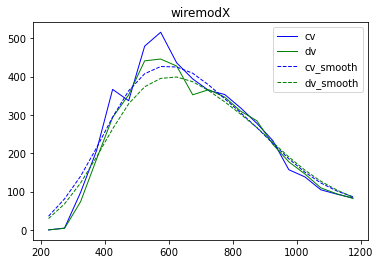

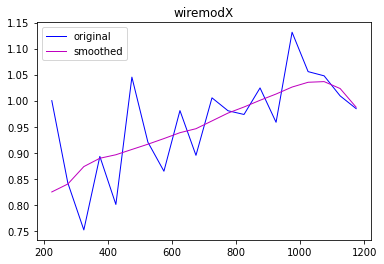

Enu_1m1p [3.07447346e-02 2.56446541e-02 1.60453754e-02 1.22450106e-02
 1.08025991e-02 8.79200883e-03 7.00255186e-03 5.30885560e-03
 3.78873004e-03 2.90697837e-03 1.51595975e-03 5.70678644e-04
 1.49349245e-04 4.35204081e-07 1.60787726e-04 6.79860733e-04
 1.24247966e-03 1.33423783e-03 5.39711891e-04 1.60415566e-04]
Enu_1m1p [0.00000000e+00 2.49679068e-02 6.16376853e-02 1.14645250e-02
 3.97519378e-02 2.03385696e-03 6.37254482e-03 1.83695780e-02
 3.64300222e-04 1.10400116e-02 2.87737682e-05 3.77870978e-04
 7.05618183e-04 5.94723092e-04 1.73041617e-03 1.72457214e-02
 3.10233804e-03 2.26838336e-03 8.32690318e-05 2.36780857e-04]


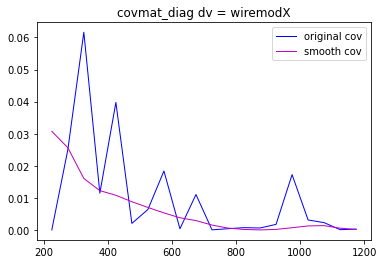

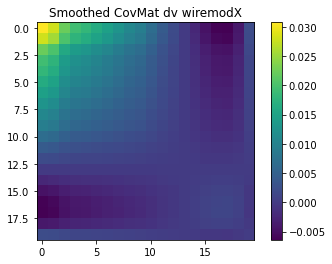

1
cv = 4424  and dv = 6107
cv POT = 898773223801000034304.000000 dv POT = 1310970606080000000000.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.69726494e+00 7.62289232e+01 1.67970151e+02
 2.81665426e+02 3.41649751e+02 4.60632743e+02 4.60131835e+02
 4.28390960e+02 3.80353098e+02 3.46701390e+02 3.41686550e+02
 3.14839475e+02 2.92238259e+02 2.13541293e+02 1.67883400e+02
 1.47355932e+02 1.12440447e+02 1.00415533e+02 9.53601179e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


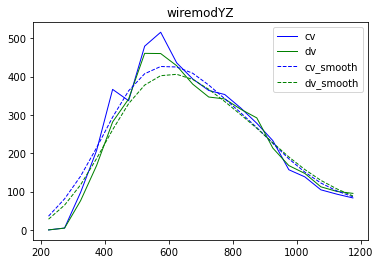

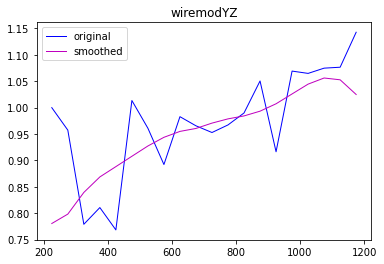

Enu_1m1p [4.82088754e-02 4.07006526e-02 2.58234541e-02 1.72409536e-02
 1.24917818e-02 8.49096158e-03 5.27657003e-03 3.15916324e-03
 2.02633307e-03 1.55347215e-03 8.58491675e-04 4.51810343e-04
 2.45893776e-04 4.47223511e-05 5.38809803e-05 6.75506370e-04
 1.98743711e-03 3.15700546e-03 2.78479589e-03 6.20946227e-04]
Enu_1m1p [0.         0.00181457 0.04886    0.0358516  0.05368594 0.00018322
 0.00152585 0.01161911 0.00029291 0.00118362 0.00222025 0.00107179
 0.00010212 0.002556   0.00698796 0.00480207 0.00421286 0.00560316
 0.00587042 0.0204198 ]


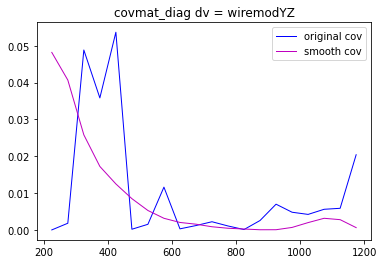

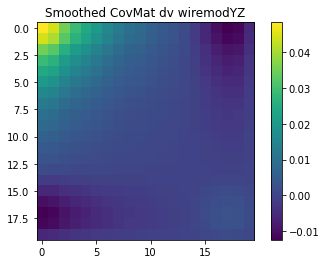

2
cv = 2953  and dv = 3220
cv POT = 579534847420999991296.000000 dv POT = 637062455184000024576.000000
cv[0] =  840.759705    cv[1] = 897.438660  rat = 0.483696
bwid = 213.542401
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 9.09699646e-01 5.30359518e+01 1.41897982e+02
 1.94417160e+02 2.41637217e+02 2.90914147e+02 2.92476656e+02
 2.91861400e+02 2.88135166e+02 2.61448471e+02 2.30483861e+02
 1.93359341e+02 1.72522565e+02 1.46257066e+02 1.05508357e+02
 9.04791252e+01 6.95602045e+01 5.49736913e+01 4.46248796e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


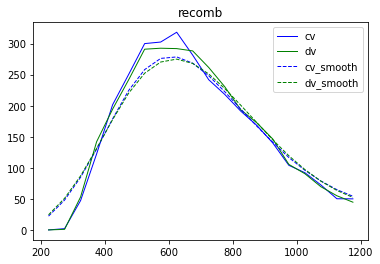

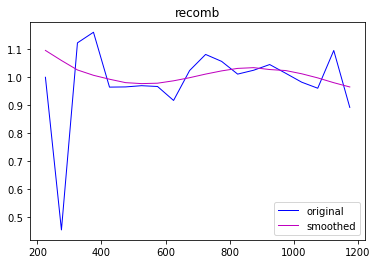

Enu_1m1p [9.19995581e-03 3.59522515e-03 6.83130133e-04 4.98778764e-05
 4.83713594e-05 3.66279319e-04 5.11973512e-04 4.47666669e-04
 1.58968950e-04 2.33353759e-06 1.29461197e-04 5.20333807e-04
 1.00513118e-03 1.18123838e-03 7.63189407e-04 5.76546632e-04
 1.55786783e-04 4.93463158e-06 3.75135310e-04 1.19660725e-03]
Enu_1m1p [0.00000000e+00 2.97189265e-01 1.51098763e-02 2.58636997e-02
 1.23688662e-03 1.18783781e-03 9.03234941e-04 1.08344997e-03
 6.85154162e-03 5.74419003e-04 6.65217549e-03 3.22142282e-03
 1.27753494e-04 6.33061761e-04 2.06862958e-03 2.03868952e-04
 3.09250714e-04 1.53149788e-03 9.15969272e-03 1.15823771e-02]


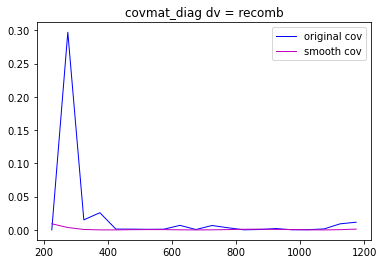

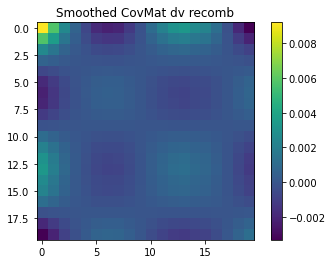

3
cv = 4424  and dv = 5609
cv POT = 898773223801000034304.000000 dv POT = 1218083168320000098304.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.10157182e+00 7.92607895e+01 1.75564717e+02
 2.92897793e+02 3.55497879e+02 4.34963831e+02 4.69177372e+02
 4.12450736e+02 3.65590348e+02 3.58079540e+02 3.39202138e+02
 2.89877488e+02 2.60962264e+02 2.34756893e+02 1.54044214e+02
 1.41717823e+02 1.00192404e+02 9.65580126e+01 7.85478230e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


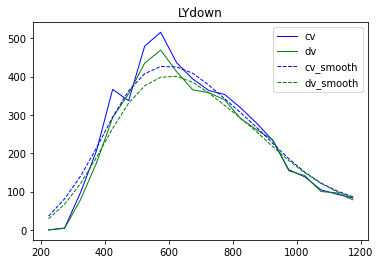

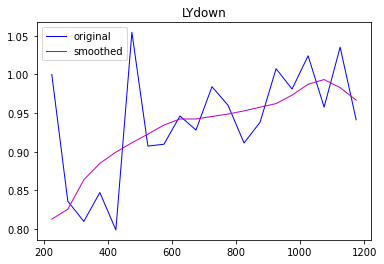

Enu_1m1p [3.50200571e-02 3.03778424e-02 1.85601582e-02 1.32190997e-02
 1.00901709e-02 7.81376731e-03 5.95461927e-03 4.27791468e-03
 3.32050104e-03 3.31160034e-03 2.95307370e-03 2.62474461e-03
 2.21582861e-03 1.78988923e-03 1.42006294e-03 7.13427443e-04
 1.61091811e-04 4.32224957e-05 2.92826580e-04 1.09933367e-03]
Enu_1m1p [0.00000000e+00 2.69001765e-02 3.61233330e-02 2.33149778e-02
 4.04266430e-02 2.98309645e-03 8.57674291e-03 8.14550160e-03
 2.88231860e-03 5.16697465e-03 2.51147749e-04 1.58174947e-03
 7.84803828e-03 3.82864829e-03 5.55339227e-05 3.55273873e-04
 5.83766296e-04 1.78326268e-03 1.24325068e-03 3.43380633e-03]


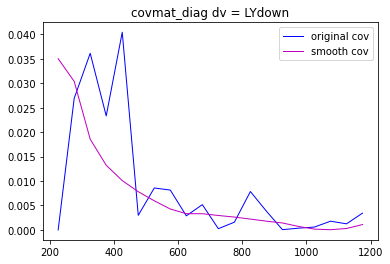

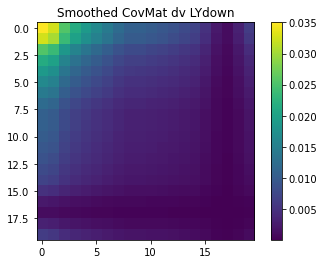

4
cv = 4424  and dv = 5608
cv POT = 898773223801000034304.000000 dv POT = 1212833087030000091136.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 5.21617190e+00 7.90946756e+01 1.71915352e+02
 2.82048925e+02 3.43073674e+02 4.65146846e+02 4.80496764e+02
 4.14411338e+02 3.89229786e+02 3.57891111e+02 3.16986740e+02
 2.85749913e+02 2.78975604e+02 2.24814622e+02 1.64564355e+02
 1.42194621e+02 1.07969756e+02 9.31831512e+01 7.95204975e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


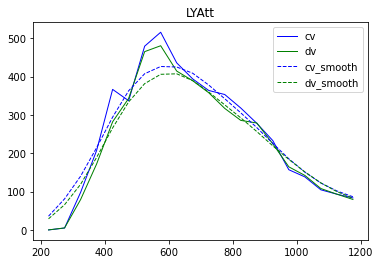

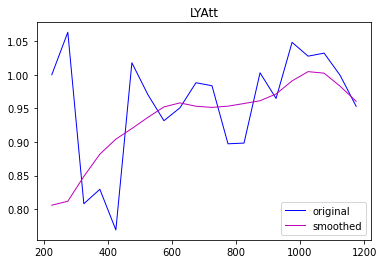

Enu_1m1p [3.75957440e-02 3.53621715e-02 2.28509856e-02 1.39362755e-02
 9.16102362e-03 6.39432751e-03 4.01478029e-03 2.28767047e-03
 1.75394805e-03 2.19016524e-03 2.35535486e-03 2.18247254e-03
 1.82836722e-03 1.49535530e-03 8.20701093e-04 8.29302386e-05
 2.13695935e-05 5.36476077e-06 2.91045631e-04 1.56081750e-03]
Enu_1m1p [0.00000000e+00 3.98999950e-03 3.67714577e-02 2.90037709e-02
 5.32022807e-02 3.15423391e-04 8.78834208e-04 4.66541287e-03
 2.41954698e-03 1.40863871e-04 2.67830310e-04 1.05389870e-02
 1.03158071e-02 8.29117887e-06 1.24008541e-03 2.31910152e-03
 7.62144474e-04 1.03153458e-03 8.54279599e-07 2.20346822e-03]


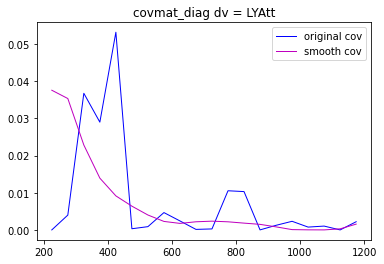

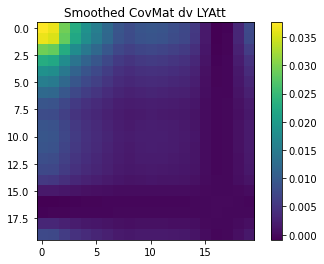

5
cv = 4424  and dv = 6165
cv POT = 898773223801000034304.000000 dv POT = 1308303170610000035840.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 5.19268186e+00 8.15750387e+01 1.78362245e+02
 2.98166074e+02 3.54283707e+02 4.66587878e+02 4.76856256e+02
 4.49418446e+02 3.83866924e+02 3.59852027e+02 3.41334301e+02
 3.05668098e+02 2.55888474e+02 2.28504597e+02 1.52056909e+02
 1.47365395e+02 1.17389745e+02 8.91845421e+01 8.89145167e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


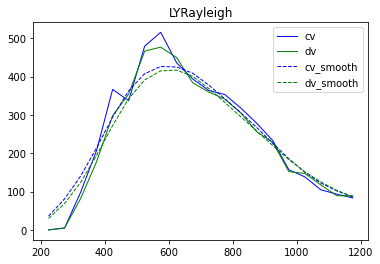

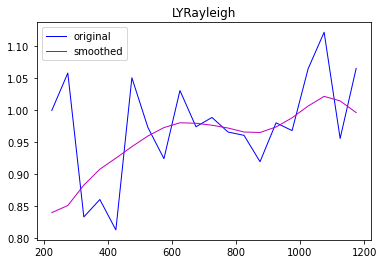

Enu_1m1p [2.54886292e-02 2.20830504e-02 1.36169884e-02 8.43841308e-03
 5.56320231e-03 3.20400258e-03 1.59496115e-03 7.19191723e-04
 3.71848425e-04 4.01052689e-04 5.34767428e-04 7.54555658e-04
 1.13686461e-03 1.18742774e-03 6.69408337e-04 1.32840055e-04
 4.69101000e-05 4.82660547e-04 2.21247340e-04 1.13868447e-05]
Enu_1m1p [0.         0.00340807 0.02769325 0.01937415 0.03485447 0.00260261
 0.00070963 0.00567956 0.00096909 0.00064939 0.00012047 0.00113808
 0.00151644 0.00641852 0.00037556 0.00099265 0.00422174 0.01492458
 0.00191808 0.00430951]


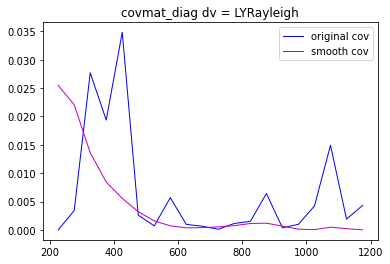

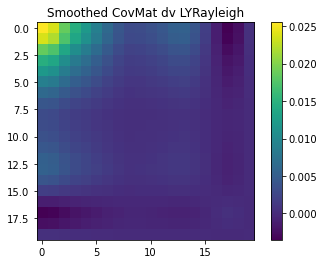

6
cv = 2953  and dv = 3006
cv POT = 579534847420999991296.000000 dv POT = 589862945463999987712.000000
cv[0] =  840.759705    cv[1] = 897.438660  rat = 0.483696
bwid = 213.542401
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.00000000e-06 4.09779399e+01 1.12240782e+02
 2.03594381e+02 2.49019851e+02 2.80959505e+02 3.10586139e+02
 3.20422076e+02 2.94140173e+02 2.64340221e+02 2.32800807e+02
 2.00203405e+02 1.71543768e+02 1.49191099e+02 1.18956989e+02
 9.42459093e+01 6.53072738e+01 5.59830307e+01 4.65499935e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


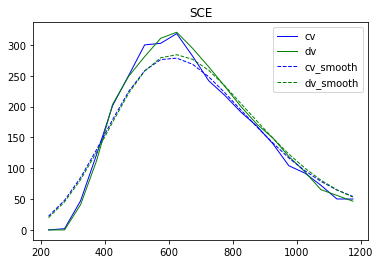

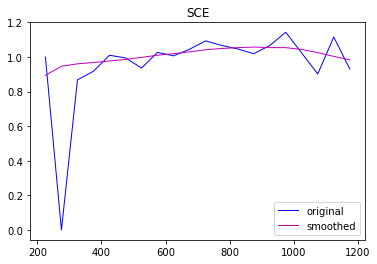

Enu_1m1p [1.12024256e-02 2.84170530e-03 1.53166875e-03 1.00451258e-03
 5.15456356e-04 1.86400952e-04 4.01802076e-06 1.14416204e-04
 3.98109836e-04 9.03340477e-04 1.78344241e-03 2.47715113e-03
 2.93601760e-03 3.33329981e-03 2.98592683e-03 2.97992168e-03
 1.92445978e-03 6.47082777e-04 1.50642319e-05 2.79686013e-04]
Enu_1m1p [0.00000000e+00 1.00000000e+00 1.75245282e-02 6.69027608e-03
 1.07624775e-04 2.46558513e-05 3.99979797e-03 7.27048207e-04
 4.87612450e-05 2.05276711e-03 8.74663975e-03 4.54015436e-03
 2.21826398e-03 3.74210778e-04 4.41632014e-03 2.06104338e-02
 5.43537379e-04 9.58087720e-03 1.34151756e-02 4.77817008e-03]


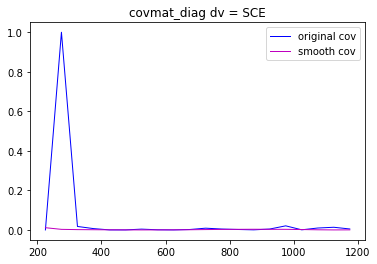

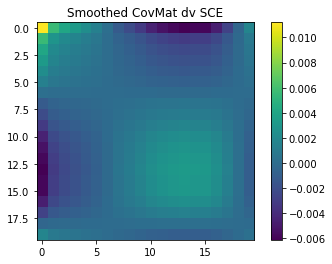

7
cv = 4424  and dv = 5902
cv POT = 898773223801000034304.000000 dv POT = 1264027045189999919104.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 5.93690026e+00 7.62769523e+01 1.91962696e+02
 2.98365669e+02 3.44679685e+02 4.36306915e+02 4.63856381e+02
 4.13487452e+02 3.86805376e+02 3.43508505e+02 3.47173794e+02
 3.13958282e+02 2.70511518e+02 2.26887550e+02 1.63370055e+02
 1.32573753e+02 1.11737685e+02 8.62850998e+01 9.18640909e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


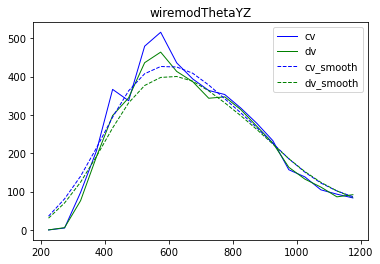

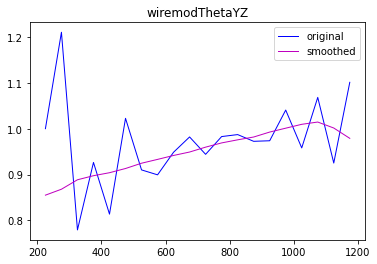

Enu_1m1p [2.09760578e-02 1.73978715e-02 1.23910639e-02 1.04963792e-02
 9.20488483e-03 7.52979044e-03 5.66151860e-03 4.47827223e-03
 3.40214732e-03 2.58850310e-03 1.61844519e-03 9.62082459e-04
 5.90094148e-04 3.30192710e-04 5.47416879e-05 1.16225666e-06
 9.00578135e-05 2.08928244e-04 2.04329062e-06 4.43662729e-04]
Enu_1m1p [0.         0.04412781 0.04864327 0.00541001 0.03465148 0.00050736
 0.00806563 0.01011432 0.00263257 0.00032484 0.00312424 0.000296
 0.0001658  0.00075888 0.00069269 0.00164432 0.00175735 0.00464256
 0.00560741 0.01020054]


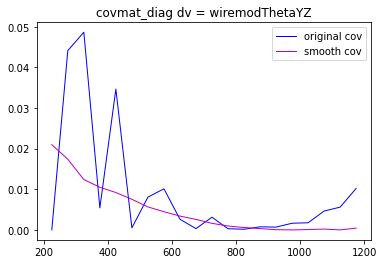

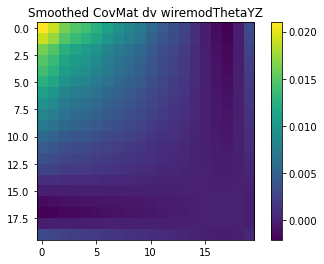

8
cv = 4424  and dv = 5926
cv POT = 898773223801000034304.000000 dv POT = 1296977725840000024576.000000
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.09289185e+00 7.57073397e+01 1.78817158e+02
 2.79354797e+02 3.57010962e+02 4.17987162e+02 4.42775470e+02
 4.08455743e+02 3.88473093e+02 3.38023189e+02 3.18144115e+02
 3.16097623e+02 2.54531875e+02 1.99401946e+02 1.81430109e+02
 1.52707437e+02 1.16511973e+02 9.73319023e+01 8.20206164e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


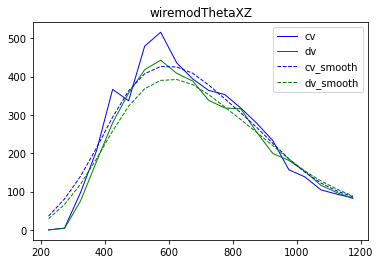

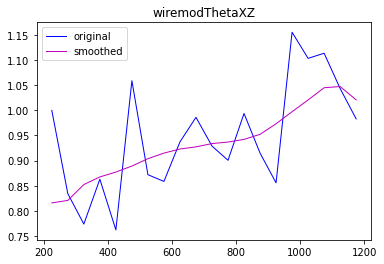

Enu_1m1p [3.39565605e-02 3.21318165e-02 2.18101460e-02 1.75611720e-02
 1.50824413e-02 1.22894408e-02 9.24804809e-03 7.24061766e-03
 5.91550756e-03 5.28196833e-03 4.36853612e-03 3.98331784e-03
 3.34158523e-03 2.26988380e-03 7.11676308e-04 6.99047661e-06
 4.32384232e-04 2.03282105e-03 2.25323375e-03 4.37047324e-04]
Enu_1m1p [0.00000000e+00 2.74836364e-02 5.12446754e-02 1.87677812e-02
 5.66463606e-02 3.49357032e-03 1.63907018e-02 2.00070932e-02
 3.95052524e-03 1.90153468e-04 5.03686630e-03 9.87702427e-03
 3.78199250e-05 7.22371579e-03 2.08145769e-02 2.42050823e-02
 1.07289415e-02 1.29448198e-02 1.89722297e-03 2.88218803e-04]


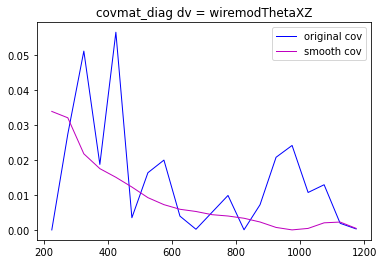

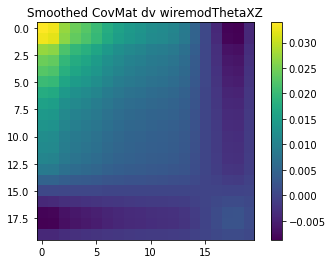

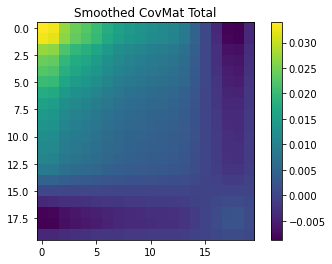

In [62]:
nbins = 20

if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
for i in range(1):
    dist = varListSel['Enu_1m1p']
#    dist = varListSel['MPID_muon']

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        print('cv = %d  and dv = %d'%(var_cv.shape[0],var_sys.shape[0]))

        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        print("cv POT = %f dv POT = %f"%(pot_cv,pot_dv))

        
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())
        ratio = pot_cv / pot_dv

#        var_cv_list = var_cv_list * cv_weights 

#        var_sys_list = var_sys_list * sys_weights 
        
        
        
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)
        #CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=1,dv_weights=1,nbin=nbins,ratio=ratio)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange,weights=dv_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        
#        hCV_smooth,binedges = np.histogram(CV_smooth,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
#        hDV_smooth,_ = np.histogram(DV_smooth,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
#        bincenters = np.diff(binedges)/2 + binedges[:-1] 

        
        
#        print(h0)
#        print(hCV)
#        print(bincenters)
        # polyfit
        #polyterms = 4
        #polyCV = np.polyfit(bincenters, hCV, polyterms)
        #fCV = np.poly1d(polyCV)    
        #poly0 = np.polyfit(bincenters, h0, polyterms)
        #f0 = np.poly1d(poly0)    
        #hCV = fCV(bincenters)
        #h0 = f0(bincenters)    
                
        #for i in range(nbins):
        #    for j in range(nbins):
        #        if hCV[i] > 0 and hCV[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
        #        elif h0[i] > 0 and h0[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(h0[i]*h0[j])
        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-8:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-8:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(CV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('covmat_diag dv = %s'%names[sysi])
        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title('Smoothed CovMat dv %s'%names[sysi])

        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth_tmp
    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('Smoothed CovMat Total')

    plt.savefig(plotfolder+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')
    

In [33]:
a = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
print(np.where(a==0))
#np.savetxt(covfolder+'/bla.csv',np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist()), delimiter=',')


(array([2281]),)


# Run 1

In [63]:
run = 'run1'
f_scaleslist = []
s_detsyslist = []
names = ['wiremodX','wiremodYZ','recomb','LYdown','LYRayleigh','SCE','wiremodThetaYZ','wiremodThetaXZ']

for name in names:
    s_detsyslist.append(name)

#df_cv = pd.read_parquet('../../data/pickles/detsys_CV_run3_nodupesMay1.parquet')
#scaleCV = 9.65858292241e+19 

a_df_sys = []

i=0
for sys in s_detsyslist:
#    print('111')
    df_sys = pd.read_parquet('%s/pickles/%s_%s_%s.parquet'%(datafolder,sys,run,tag))
    print(df_sys.shape[0])
    i+=1
    a_df_sys.append(df_sys)
    print("total %d, cv = %d dv = %d"%(df_sys.shape[0],df_sys.query("isCV==True").shape[0],df_sys.query("isCV==False").shape[0]))
#    print(df_sys.shape[0])

#df_numu_run3_presel = pd.read_parquet('../../data/pickles/numu_run1_nodupesMay1.parquet')
#print((list(a_df_sys[7])))


124884
total 124884, cv = 106578 dv = 18306
125115
total 125115, cv = 106578 dv = 18537
19956
total 19956, cv = 10017 dv = 9939
19501
total 19501, cv = 10017 dv = 9484
21024
total 21024, cv = 10017 dv = 11007
20369
total 20369, cv = 10017 dv = 10352
124406
total 124406, cv = 106578 dv = 17828
124251
total 124251, cv = 106578 dv = 17673


8
0
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.13101119e+00 7.35645417e+01 1.85017301e+02
 2.93515493e+02 3.52289004e+02 4.41091211e+02 4.45824430e+02
 4.27531409e+02 3.52516728e+02 3.65797346e+02 3.46384554e+02
 3.09604978e+02 2.84958445e+02 2.23327154e+02 1.77621697e+02
 1.46081792e+02 1.09592260e+02 9.41204578e+01 8.21532250e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


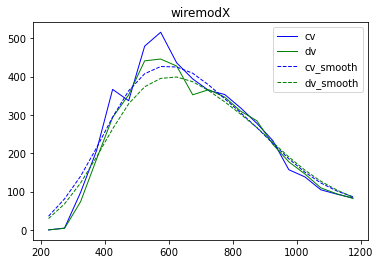

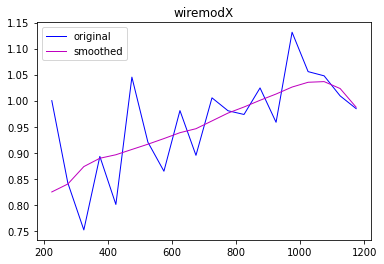

Enu_1m1p [3.72817894e-02 3.05344205e-02 1.83726445e-02 1.37686057e-02
 1.20556051e-02 9.70169519e-03 7.64204800e-03 5.72606774e-03
 4.03723244e-03 3.07264429e-03 1.57737538e-03 5.84645162e-04
 1.51197001e-04 4.34917166e-07 1.58774433e-04 6.62584414e-04
 1.20017490e-03 1.28721929e-03 5.27458142e-04 1.62473377e-04]
Enu_1m1p [0.         0.02079855 0.06132464 0.00593651 0.04040127 0.00011957
 0.00798033 0.01213894 0.00219034 0.00681069 0.00040783 0.00039552
 0.00313835 0.00066326 0.00395468 0.00341065 0.00101228 0.00048373
 0.00088776 0.01376358]


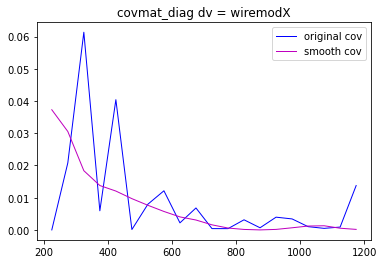

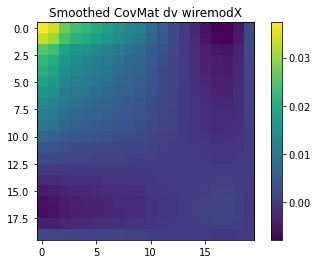

1
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.69726494e+00 7.62289232e+01 1.67970151e+02
 2.81665426e+02 3.41649751e+02 4.60632743e+02 4.60131835e+02
 4.28390960e+02 3.80353098e+02 3.46701390e+02 3.41686550e+02
 3.14839475e+02 2.92238259e+02 2.13541293e+02 1.67883400e+02
 1.47355932e+02 1.12440447e+02 1.00415533e+02 9.53601179e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


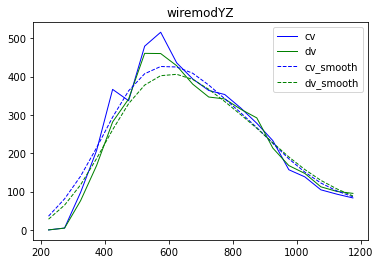

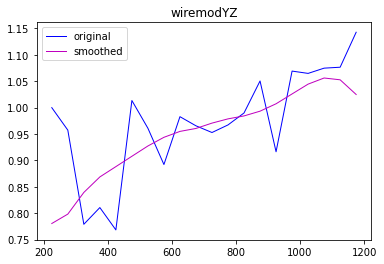

Enu_1m1p [6.17718164e-02 5.09869691e-02 3.07677290e-02 1.98469542e-02
 1.40636260e-02 9.35278739e-03 5.68988316e-03 3.34730322e-03
 2.12184763e-03 1.61721317e-03 8.84404760e-04 4.61622513e-04
 2.49811064e-04 4.50234443e-05 5.34883561e-05 6.58394367e-04
 1.90261714e-03 2.98905853e-03 2.64520532e-03 6.05849197e-04]
Enu_1m1p [0.00000000e+00 3.59619820e-01 5.72595326e-02 2.70908956e-02
 4.77367178e-02 1.70781896e-04 2.50596861e-03 8.66875491e-03
 3.91753524e-04 7.39372500e-04 4.05875594e-03 1.37143355e-03
 1.57498166e-03 2.42314332e-04 7.77582411e-03 1.85301988e-03
 6.17630794e-05 3.11135489e-02 2.67699656e-03 1.07712056e-03]


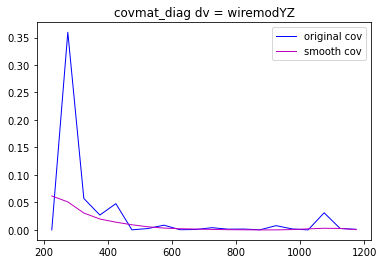

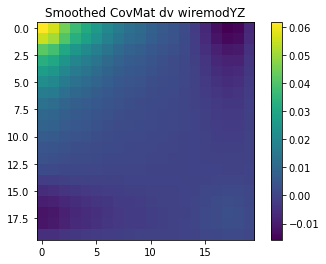

2
cv[0] =  903.975952    cv[1] = 579.812805  rat = 0.609235
bwid = 212.604090
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 1.56182292e+01 1.38712777e+02 1.99753156e+02
 1.88251623e+02 1.93019787e+02 2.62723174e+02 2.74784420e+02
 2.96873936e+02 2.62342621e+02 2.31426603e+02 2.30837619e+02
 1.90942722e+02 1.37665848e+02 1.52445495e+02 8.06272334e+01
 7.90753259e+01 6.13826236e+01 7.67054092e+01 3.83087121e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


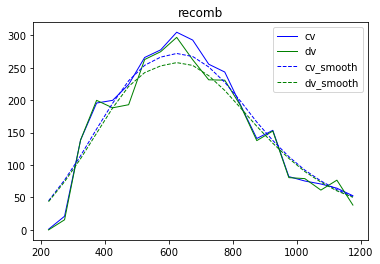

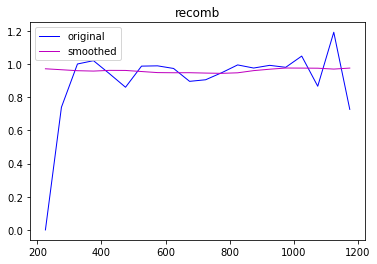

Enu_1m1p [0.00079649 0.00116646 0.00161804 0.00181502 0.00145403 0.00148903
 0.00206178 0.00272363 0.00282584 0.0027961  0.00305081 0.00324382
 0.00286646 0.00157816 0.00095599 0.00055565 0.00057754 0.00060948
 0.0009068  0.00056908]
Enu_1m1p [1.00000000e+00 3.32022969e-02 2.08152434e-03 4.42859197e-03
 5.83401182e-03 1.91460549e-02 1.91358408e-07 8.06455730e-05
 7.67378960e-05 1.03069390e-02 9.71348881e-03 1.80574939e-03
 1.20620076e-03 4.58393691e-04 4.24010552e-03 4.45104005e-03
 3.08745929e-03 2.14891450e-02 2.18114320e-02 9.38460696e-02]


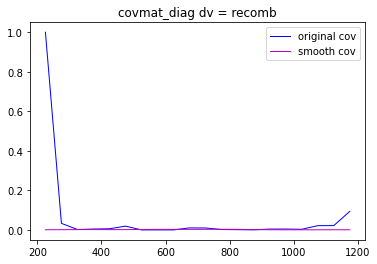

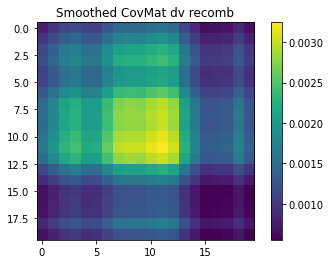

3
cv[0] =  903.975952    cv[1] = 579.812805  rat = 0.609235
bwid = 212.604090
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 2.16353864e+01 1.46084293e+02 1.97249461e+02
 2.11358493e+02 2.06116399e+02 2.51124883e+02 2.75523905e+02
 3.00886228e+02 2.92564160e+02 2.54753792e+02 2.27277397e+02
 1.84408391e+02 1.39517580e+02 1.42505714e+02 7.46309616e+01
 8.64308952e+01 6.84977041e+01 6.78386770e+01 4.58454840e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


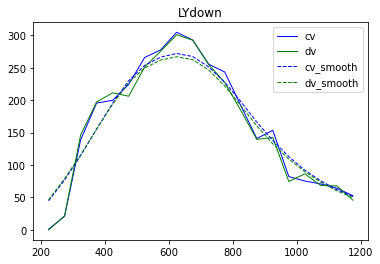

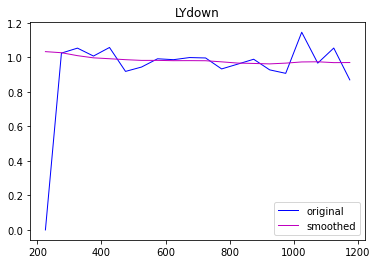

Enu_1m1p [1.11284964e-03 7.45090324e-04 1.11371708e-04 4.25195631e-06
 5.21007506e-05 1.63001117e-04 2.89711541e-04 2.87997370e-04
 3.49395764e-04 3.38899826e-04 3.61383722e-04 6.56457021e-04
 1.08352086e-03 1.24013460e-03 1.43181356e-03 1.10904216e-03
 6.88061419e-04 6.34943219e-04 9.16194324e-04 8.82560700e-04]
Enu_1m1p [1.00000000e+00 6.29160701e-04 1.28714259e-02 1.90918664e-06
 2.24367917e-03 5.68746216e-03 3.68423926e-03 7.26961748e-05
 1.73277873e-04 7.49763291e-04 4.19688115e-04 2.65829432e-03
 3.29180016e-04 2.05727276e-04 8.03981752e-03 8.97411942e-03
 7.14163280e-03 2.76410253e-03 3.88862296e-03 2.12471738e-02]


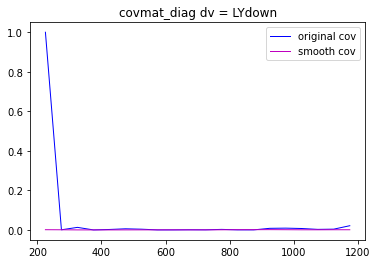

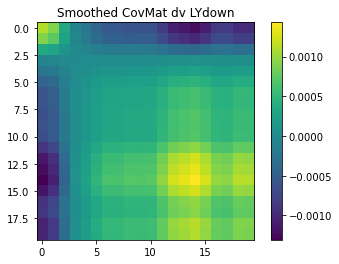

4
cv[0] =  903.975952    cv[1] = 579.812805  rat = 0.609235
bwid = 212.604090
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 2.61516539e+01 1.28889238e+02 1.89185227e+02
 1.98485053e+02 2.21862248e+02 2.57574154e+02 2.83309206e+02
 2.89905199e+02 2.80972977e+02 2.38542118e+02 2.44471390e+02
 1.80567294e+02 1.47815400e+02 1.42275580e+02 9.08627844e+01
 7.46841702e+01 7.16563142e+01 6.97113755e+01 4.43852532e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


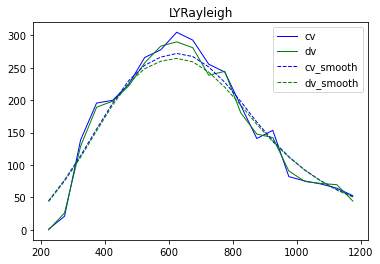

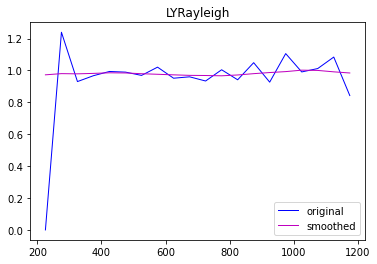

Enu_1m1p [7.77667048e-04 4.09876202e-04 4.63808550e-04 3.50198763e-04
 2.21705763e-04 2.55467203e-04 4.28802509e-04 5.95608557e-04
 7.85519792e-04 9.82247044e-04 1.04552448e-03 1.17009122e-03
 8.29996820e-04 4.16612791e-04 1.77492987e-04 5.42744867e-05
 3.03625231e-06 6.62224330e-09 7.77715861e-05 2.58126078e-04]
Enu_1m1p [1.00000000e+00 5.60175872e-02 1.30832933e-03 3.20916372e-04
 1.63212112e-04 2.70105384e-03 1.87783682e-03 1.24060288e-04
 5.15871369e-04 5.09312951e-03 2.67222257e-03 6.86217450e-04
 2.23490246e-03 1.82867548e-03 4.80181084e-03 1.07793622e-03
 3.24666729e-03 1.99232301e-04 1.01818096e-02 1.94063615e-02]


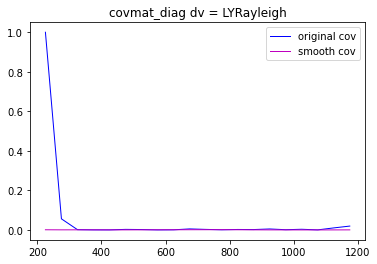

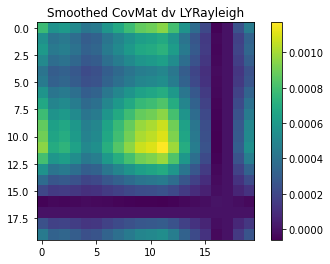

5
cv[0] =  903.975952    cv[1] = 579.812805  rat = 0.609235
bwid = 212.604090
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.31051137e+01 1.29897227e+02 1.98463509e+02
 2.03958334e+02 2.30092794e+02 2.86115427e+02 2.97773389e+02
 3.05738512e+02 3.04515021e+02 2.58641631e+02 2.48619473e+02
 2.10144625e+02 1.47980627e+02 1.41999435e+02 8.41350220e+01
 8.00613810e+01 7.16707354e+01 6.93813460e+01 6.07418158e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


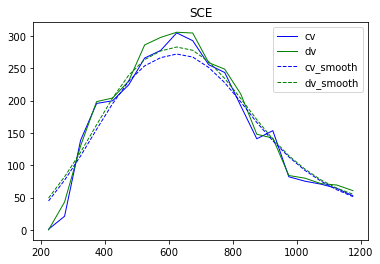

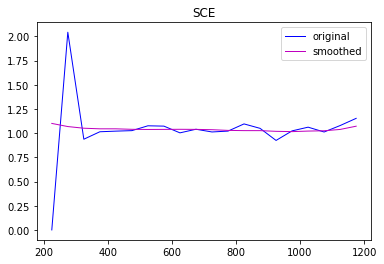

Enu_1m1p [0.00919615 0.00436433 0.00247698 0.00193027 0.00192182 0.001521
 0.00140314 0.0014599  0.00152935 0.00146729 0.00123286 0.00079548
 0.00067366 0.00066143 0.00035211 0.00025063 0.00045493 0.00060002
 0.00142703 0.00483461]
Enu_1m1p [1.00000000e+00 3.45750740e-02 3.10285660e-03 1.76276124e-03
 2.87762707e-04 2.20209297e-03 4.32627632e-03 4.09733953e-03
 1.63610440e-03 6.74822512e-04 7.85025159e-04 1.19914620e-03
 7.38300034e-03 2.25791564e-03 1.88473287e-02 1.09102235e-03
 4.96754347e-04 1.23560505e-03 7.49405603e-03 2.76559489e-02]


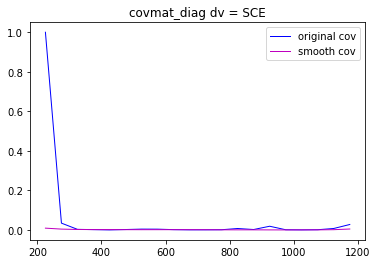

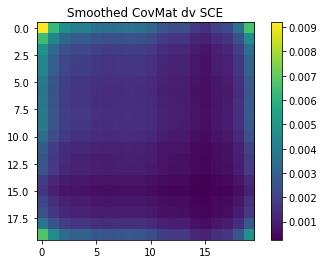

6
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 5.93690026e+00 7.62769523e+01 1.91962696e+02
 2.98365669e+02 3.44679685e+02 4.36306915e+02 4.63856381e+02
 4.13487452e+02 3.86805376e+02 3.43508505e+02 3.47173794e+02
 3.13958282e+02 2.70511518e+02 2.26887550e+02 1.63370055e+02
 1.32573753e+02 1.11737685e+02 8.62850998e+01 9.18640909e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


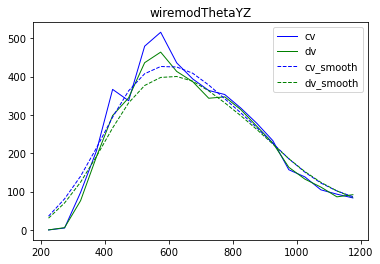

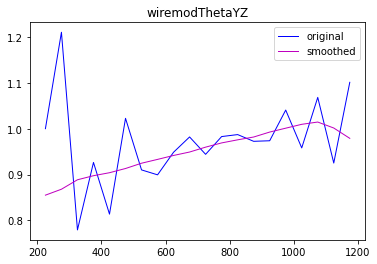

Enu_1m1p [2.45285565e-02 2.00413447e-02 1.39431476e-02 1.16945025e-02
 1.01817425e-02 8.24526837e-03 6.12216938e-03 4.79945098e-03
 3.61287907e-03 2.72725876e-03 1.68628424e-03 9.92879039e-04
 6.04785509e-04 3.36303755e-04 5.51497276e-05 1.16100500e-06
 8.92112099e-05 2.05951351e-04 2.04037403e-06 4.53208803e-04]
Enu_1m1p [0.00000000e+00 1.78150770e-01 4.05208999e-02 2.86405729e-03
 4.16257856e-02 1.11549665e-04 6.79168560e-03 1.08779192e-02
 2.30685120e-03 3.94908384e-05 3.19784164e-03 1.68086883e-04
 1.44440375e-03 2.49803536e-03 8.66184447e-04 2.69851825e-03
 7.63871184e-04 1.32340399e-02 7.56214167e-03 9.24197152e-04]


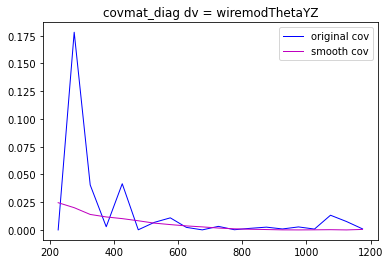

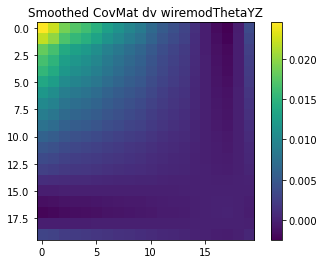

7
cv[0] =  400.276123    cv[1] = 1013.727722  rat = 0.283080
bwid = 200.151357
!!!!!!!!!!!!!!!!!!!!
[1.00000000e-06 4.09289185e+00 7.57073397e+01 1.78817158e+02
 2.79354797e+02 3.57010962e+02 4.17987162e+02 4.42775470e+02
 4.08455743e+02 3.88473093e+02 3.38023189e+02 3.18144115e+02
 3.16097623e+02 2.54531875e+02 1.99401946e+02 1.81430109e+02
 1.52707437e+02 1.16511973e+02 9.73319023e+01 8.20206164e+01]
!!!!!!!!!!!!!!!!!!!!


<ipython-input-61-885928dc52b4>:86: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  bwid=0.75*0.9*(xmax-xmin)*((sum(cv_hist))**(-1./7))
<ipython-input-61-885928dc52b4>:134: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatCV=(mykdeCV)*(sum(cv_hist))/sum(mykdeCV)
<ipython-input-61-885928dc52b4>:142: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  yhatDV=(mykdeDV)*(sum(dv_hist))/sum(mykdeDV)


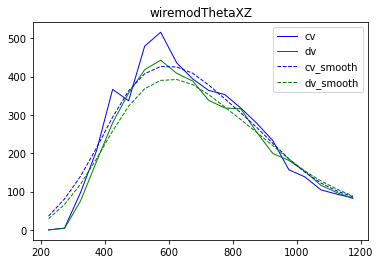

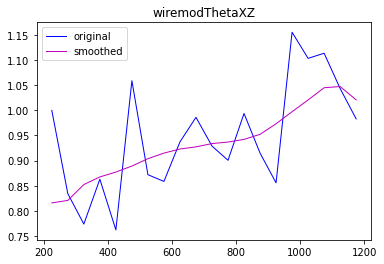

Enu_1m1p [4.16273618e-02 3.91495015e-02 2.55892295e-02 2.02438593e-02
 1.71940531e-02 1.38216813e-02 1.02320293e-02 7.91403750e-03
 6.40839196e-03 5.69593247e-03 4.67770883e-03 4.25165479e-03
 3.54660167e-03 2.38343868e-03 7.31182248e-04 7.00900809e-06
 4.23576446e-04 1.94512170e-03 2.15112370e-03 4.28097653e-04]
Enu_1m1p [0.00000000e+00 5.78105461e-03 3.37157229e-02 1.01020967e-02
 6.02860942e-02 3.13174586e-03 1.70729951e-02 1.65727604e-02
 6.68474885e-03 7.62887880e-05 7.61194051e-03 9.46900197e-03
 1.99019336e-03 5.07526413e-03 1.43812063e-02 7.67128389e-03
 1.79979826e-03 8.94643837e-03 1.55729660e-03 1.18879900e-02]


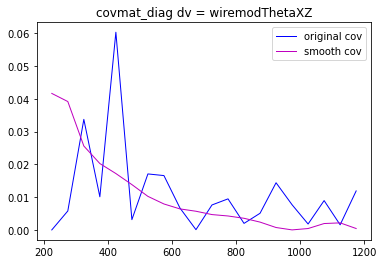

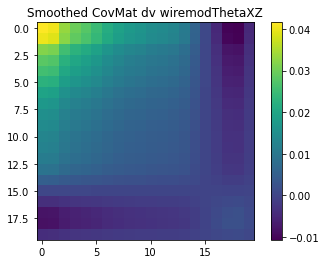

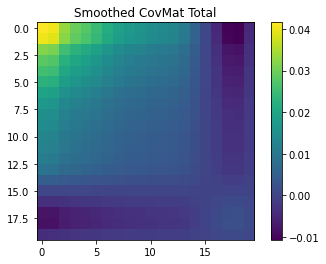

In [65]:
nbins = 20
if not os.path.exists(plotfolder):
    os.makedirs(plotfolder)
if not os.path.exists(covfolder):
    os.makedirs(covfolder)

    
#for dist in varListSel: #[9:10]
#for _,dist in varListSel.items(): # loop over all variables 
for i in range(1):
    dist = varListSel['Enu_1m1p']
#    dist = varListSel['MPID_muon']

    cov = np.zeros((nbins,nbins))
    cov_smooth = np.zeros((nbins,nbins))

    
    print(len(a_df_sys))
    for sysi in range(len(a_df_sys)): # loop over all detvars
#    for sysi in range(1):
#        sysi = 3
#        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0 and Enu_1m1p_cv > 0')
        print(sysi)
        myvardf = a_df_sys[sysi].query('Enu_1m1p > 0')
        
        var_sys = myvardf.query(s_cuts)[dist.myname]
        var_cv = myvardf.query(s_cuts_cv)[dist.myname]
        # get cv and detvar lists and apply weights
        var_cv_list = np.array(var_cv.astype(float).values.tolist())
        var_sys_list = np.array(var_sys.astype(float).values.tolist())
        cv_weights = np.array(myvardf.query(s_cuts_cv)['xsec_corr_weight'].astype(float).values.tolist())
        dv_weights = np.array(myvardf.query(s_cuts)['xsec_corr_weight'].astype(float).values.tolist())

        
        pot_cv=myvardf.query("isCV==True").iloc[0]["POT"]
        pot_dv=myvardf.query("isCV==False").iloc[0]["POT"]
        ratio =pot_cv/pot_dv
        
#        var_cv_list = var_cv_list * cv_weights

#        var_sys_list = var_sys_list * sys_weights
        
        
        CV_smooth,DV_smooth = smooth(var_cv_list,var_sys_list,dist.myrange[0],dist.myrange[1],names[sysi],cv_weights=cv_weights,dv_weights=dv_weights,nbin=nbins,ratio=ratio)


        
#        print(cv_weights)
        hCV,binedges = np.histogram(var_cv_list,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
        h0,_ = np.histogram(var_sys_list,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
        bincenters = np.diff(binedges)/2 + binedges[:-1] 
        h0 = h0 *ratio
        
#        hCV_smooth,binedges = np.histogram(CV_smooth,bins=nbins,range=dist.myrange)#,weights= cv_weights)#cv_scale)
#        hDV_smooth,_ = np.histogram(DV_smooth,bins=nbins,range=dist.myrange)#,weights=sys_weights)#cv_scale)
#        bincenters = np.diff(binedges)/2 + binedges[:-1] 

        
        
#        print(h0)
#        print(hCV)
#        print(bincenters)
        # polyfit
        #polyterms = 4
        #polyCV = np.polyfit(bincenters, hCV, polyterms)
        #fCV = np.poly1d(polyCV)    
        #poly0 = np.polyfit(bincenters, h0, polyterms)
        #f0 = np.poly1d(poly0)    
        #hCV = fCV(bincenters)
        #h0 = f0(bincenters)    
                
        #for i in range(nbins):
        #    for j in range(nbins):
        #        if hCV[i] > 0 and hCV[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
        #        elif h0[i] > 0 and h0[j] > 0:
        #            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(h0[i]*h0[j])
        cov_tmp = np.zeros((nbins,nbins))
        cov_smooth_tmp = np.zeros((nbins,nbins))            
        for i in range(nbins):
            for j in range(nbins):
                if (hCV[i]*hCV[j])<1e-8:
                    cov_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_tmp[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
    #    print(dist.myname,cov.diagonal())
        
        for i in range(nbins):
            for j in range(nbins):
                if (CV_smooth[i]*CV_smooth[j])<1e-8:
                    cov_smooth_tmp[i][j]=0
                else:
    #               print('%d,%d'%(h0[i],hCV[j]))
                    cov_smooth_tmp[i][j] += (DV_smooth[i]-CV_smooth[i])*(DV_smooth[j]-CV_smooth[j])/(DV_smooth[i]*CV_smooth[j])
    #               print('result is: %d*%d/%d'%(h0[i]-hCV[i],h0[j]-hCV[j],hCV[i]*hCV[j]))
        print(dist.myname,cov_smooth_tmp.diagonal())
        print(dist.myname,cov_tmp.diagonal())
        
        offset = (dist.myrange[1] - dist.myrange[0] )/(2*nbins)
        x= np.linspace(dist.myrange[0]+offset,dist.myrange[1]-offset,nbins)
        
        plt.plot(x,cov_tmp.diagonal(),linewidth=1, linestyle="-", c="b",label='original cov')
        plt.plot(x,cov_smooth_tmp.diagonal(),linewidth=1, linestyle="-", c="m",label='smooth cov')
        plt.legend()
        plt.title('covmat_diag dv = %s'%names[sysi])
        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov_diag.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        
        plt.show()
        
        plt.imshow(cov_smooth_tmp, interpolation='none')
        plt.colorbar(orientation='vertical')
        plt.title('Smoothed CovMat dv %s'%names[sysi])

        plt.savefig(plotfolder+'/detsys_%s_%s_%s_cov.png'%(dist.myname, run,names[sysi]),dpi=120,bbox_inches='tight')
        plt.show()

        cov = cov+ cov_tmp
        cov_smooth = cov_smooth_tmp
    plt.imshow(cov_smooth, interpolation='none')
    plt.colorbar(orientation='vertical')
    plt.title('Smoothed CovMat Total')

    plt.savefig(plotfolder+'/detsys_%s_%s_cov.png'%(dist.myname, run),dpi=120,bbox_inches='tight')

    plt.show()
    np.savetxt(covfolder+'/detsys_%s_%s_cov.csv'%(dist.myname, run),cov_smooth, delimiter=',')

In [66]:
from numpy import genfromtxt
run3 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-01-21/detsys_Enu_1m1p_run3_cov.csv', delimiter=',')
run1 = genfromtxt('/home/itran/SLAC_Work/ML/1L1PSelection/outputs/covMatrix2021-01-21/detsys_Enu_1m1p_run1_cov.csv', delimiter=',')
print(np.average(run3))
print(run3.diagonal())
bla = run3-run1
print(100*bla.diagonal()/run3.diagonal())

0.004475402226397698
[3.39565605e-02 3.21318165e-02 2.18101460e-02 1.75611720e-02
 1.50824413e-02 1.22894408e-02 9.24804809e-03 7.24061766e-03
 5.91550756e-03 5.28196833e-03 4.36853612e-03 3.98331784e-03
 3.34158523e-03 2.26988380e-03 7.11676308e-04 6.99047661e-06
 4.32384232e-04 2.03282105e-03 2.25323375e-03 4.37047324e-04]
[-22.59004214 -21.84029993 -17.32718148 -15.27624315 -14.00046444
 -12.46794315 -10.63988016  -9.30058565  -8.33207288  -7.83730838
  -7.07726112  -6.73651862  -6.13530479  -5.00267362  -2.74084442
  -0.265096     2.03702744   4.31416951   4.53171157   2.04775792]


In [31]:
dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]
        
    # polyfit
    polyterms = 4
    polyCV = np.polyfit(bincenters, hCV, polyterms)
    fCV = np.poly1d(polyCV)    
    poly0 = np.polyfit(bincenters, h0, polyterms)
    f0 = np.poly1d(poly0)    
    
    hCV_fit = fCV(bincenters)
    h0_fit = f0(bincenters)
    
    #Savitsky Golay
    window_length = 7
    little_poly_t = 3
    hCV_sgfit = signal.savgol_filter(hCV, window_length, little_poly_t)
    h0_sgfit = signal.savgol_filter(h0, window_length, little_poly_t)
        
    
    fig,ax = plt.subplots(figsize=(16,11))
        
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    #plt.plot(dvarLinspace,fCV(dvarLinspace),label='CV Fit (%f)'%chi2_cv)
    #plt.plot(dvarLinspace,f0(dvarLinspace),label='Variation Fit (%f)'%chi2_h0)
    #plt.scatter(bincenters,hCV_sgfit,label='CV SG Fit (%f)'%chi2_cv_sgfit,marker='o',s=120)
    #plt.scatter(bincenters,h0_sgfit,label='Variation SG Fit (%f)'%chi2_h0_sgfit,marker='o')
    ax.set_title(s_detsyslist[sysi],fontsize=30)
    ax.set_xlabel(dvar.mylabel,fontsize=20)
    ax.legend(fontsize=15)
    
    
    for i in range(nbins):
        for j in range(nbins):
            cov[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            #cov[i][j] += (h0_fit[i]-hCV_fit[i])*(h0_fit[j]-hCV_fit[j])/(hCV_fit[i]*hCV_fit[j])
            #cov[i][j] += (h0_sgfit[i]-hCV_sgfit[i])*(h0_sgfit[j]-hCV_sgfit[j])/(hCV_sgfit[i]*hCV_sgfit[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
            
            
print('flat sys:',np.sqrt(flatsys),flatsys)
print(dvar.myname,cov[0][0],cov[7][7])
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov.T,cmap='cool')#,vmin=-2,vmax=3)
cbar = fig.colorbar(crat)
ax.set_title('Fractional Covariance Matrix',fontsize=30)
ax.set_ylabel(dvar.mylabel,fontsize=20)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#np.savetxt('/home/dcianci/Downloads/detsys_enu_sgfit_cov.csv',cov,delimiter=',')

#cov = np.zeros((nbins,nbins))
#for i in range(nbins):
#    cov[i][i] = flatsys
#np.savetxt('/home/dcianci/Downloads/detsys_enu_flat_cov.csv',cov,delimiter=',')



NameError: name 'a_overlap_sys' is not defined

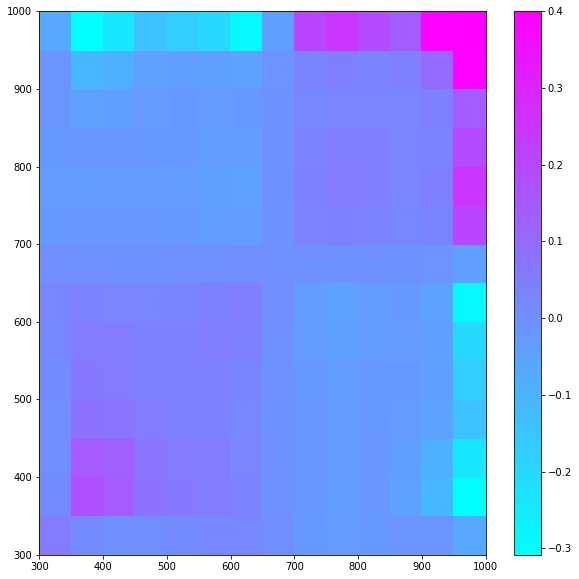

In [138]:
X, Y = np.meshgrid(binedges,binedges)

fig,ax = plt.subplots(figsize=(10,10))
crat = ax.pcolormesh(X, Y,cov,cmap='cool',vmax=.4)
cbar = fig.colorbar(crat)


In [59]:
list(df_sys)

['Proton_CosTheta_cv',
 'Lepton_CosTheta_cv',
 'Proton_CosTheta',
 'Lepton_CosTheta',
 'bkgBDT_run3_cv',
 'bkgBDT_run3',
 'run',
 'subrun',
 'event',
 'vtxid',
 'Xreco',
 'Yreco',
 'Zreco',
 'InFiducial',
 'AnyReco',
 'NTracks',
 'N5cmTracks',
 'PassSimpleCuts',
 'PassShowerReco',
 'PassSecondShower',
 'FailedBoost',
 'FailedBoost_1m1p',
 'FailedBoost_1e1p',
 'Good3DReco',
 'Eta',
 'OpenAng',
 'Thetas',
 'Phis',
 'QCorrectionFactorVertex',
 'ChargeNearTrunk',
 'LongTrackLen',
 'ShortTrackLen',
 'MaxShrFrac',
 'MinShrFrac',
 'CCQEEnergyShift_1m1p',
 'Enu_1m1p',
 'PhiT_1m1p',
 'AlphaT_1m1p',
 'PT_1m1p',
 'PTRat_1m1p',
 'BjX_1m1p',
 'BjY_1m1p',
 'Q2_1m1p',
 'Sph_1m1p',
 'PzEnu_1m1p',
 'Q0_1m1p',
 'Q3_1m1p',
 'OpenAngB_1m1p',
 'ThetasB_1m1p',
 'PhisB_1m1p',
 'PhiTB_1m1p',
 'AlphaTB_1m1p',
 'PTB_1m1p',
 'BjXB_1m1p',
 'BjYB_1m1p',
 'Q2B_1m1p',
 'SphB_1m1p',
 'CCQEEnergyShift_1e1p',
 'Enu_1e1p',
 'PhiT_1e1p',
 'AlphaT_1e1p',
 'PT_1e1p',
 'PTRat_1e1p',
 'BjX_1e1p',
 'BjY_1e1p',
 'Q2_1e1p',
 'S

wiremodX
polyfit degrees: 0 7.19169553120931
sg window_length 7 degrees: 10 7.116065343221028
wiremodYZ
polyfit degrees: 0 14.652654012044271
sg window_length 7 degrees: 10 14.726931889851889
wiremoddEdx
polyfit degrees: 0 8.301823933919271
sg window_length 1 degrees: 10 8.199064095815023
LYdown
polyfit degrees: 0 5.715118010838826
sg window_length 9 degrees: 10 5.694827159245809
SCE
polyfit degrees: 0 14.362505276997885
sg window_length 9 degrees: 10 14.273023923238119
wiremodThetaYZ
polyfit degrees: 0 6.244710286458333
sg window_length 11 degrees: 10 6.2069681485493975
wiremodThetaXZ
polyfit degrees: 0 10.961923917134603
sg window_length 3 degrees: 10 10.499676068623861
flat sys: 0.08959695735944827 0.008027614768070792


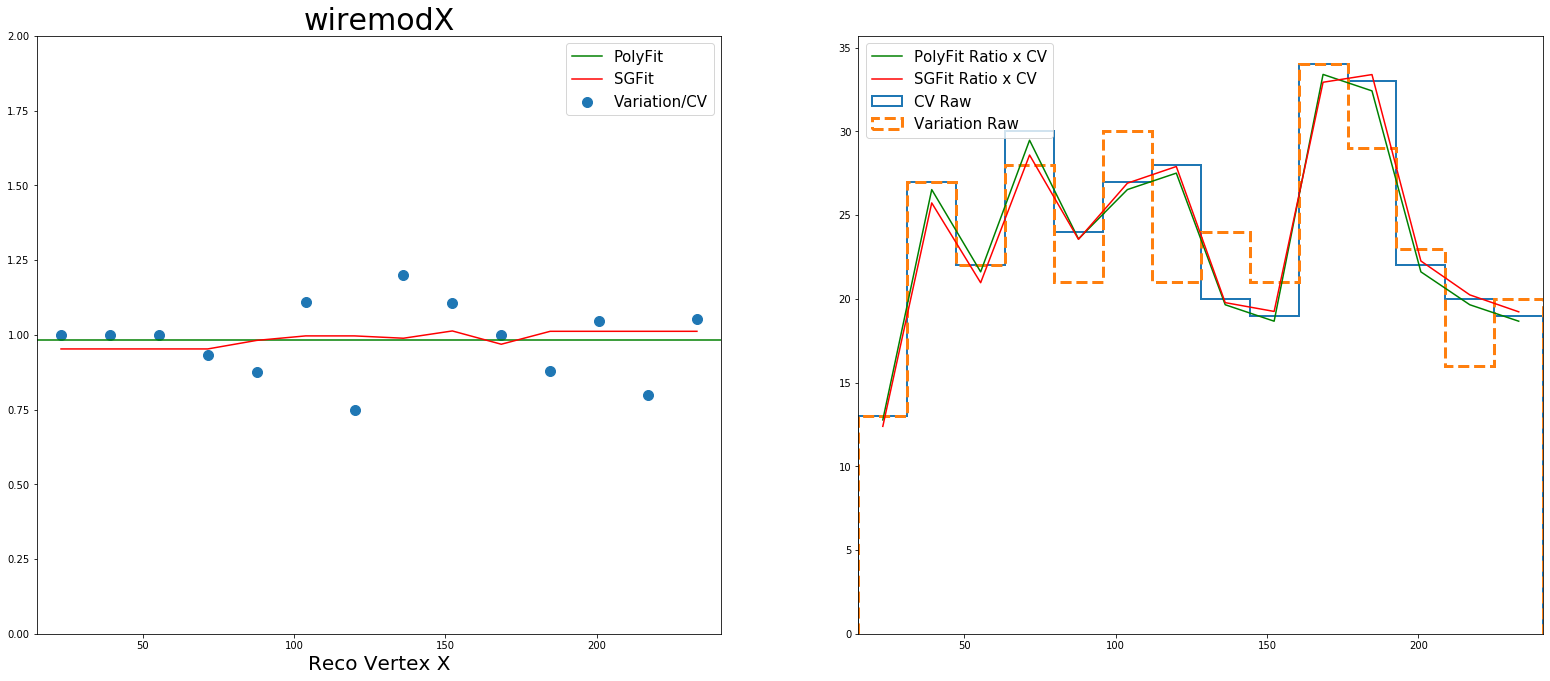

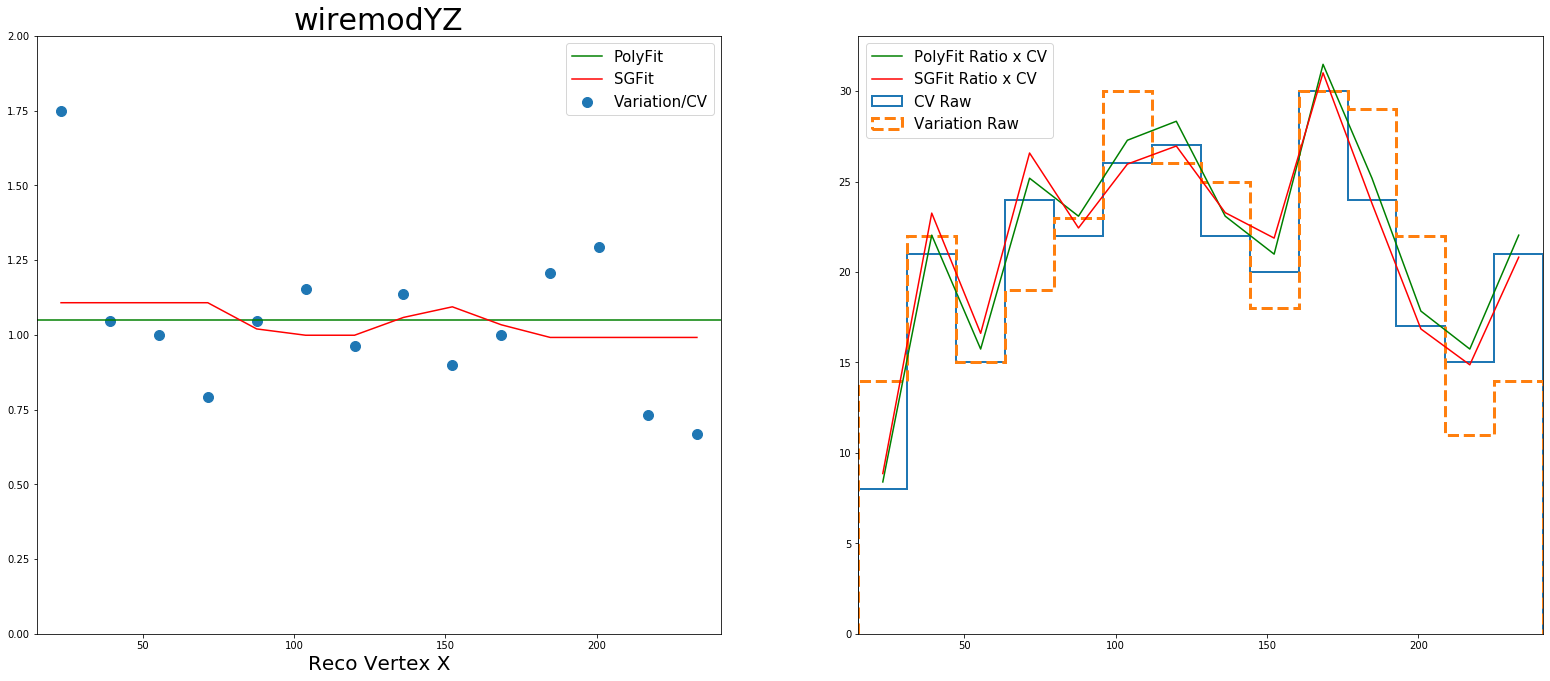

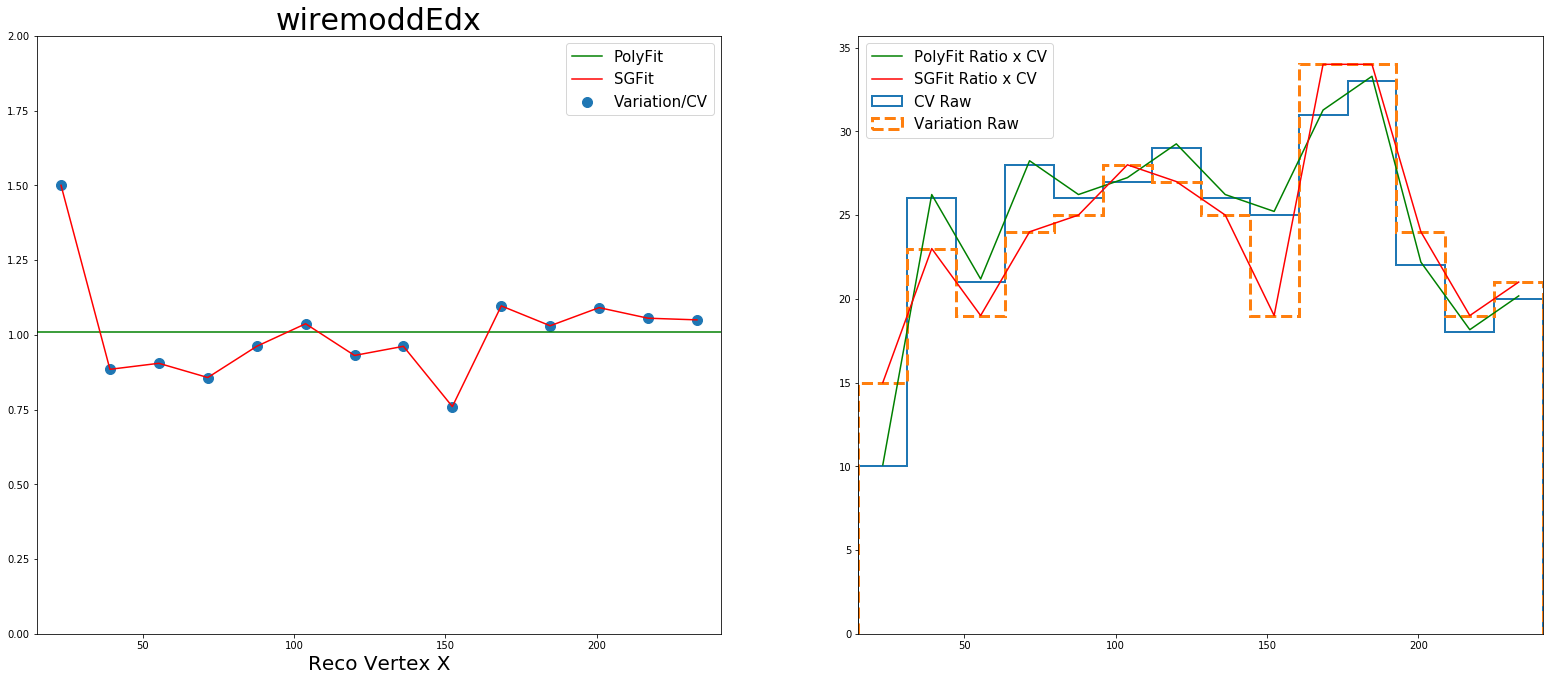

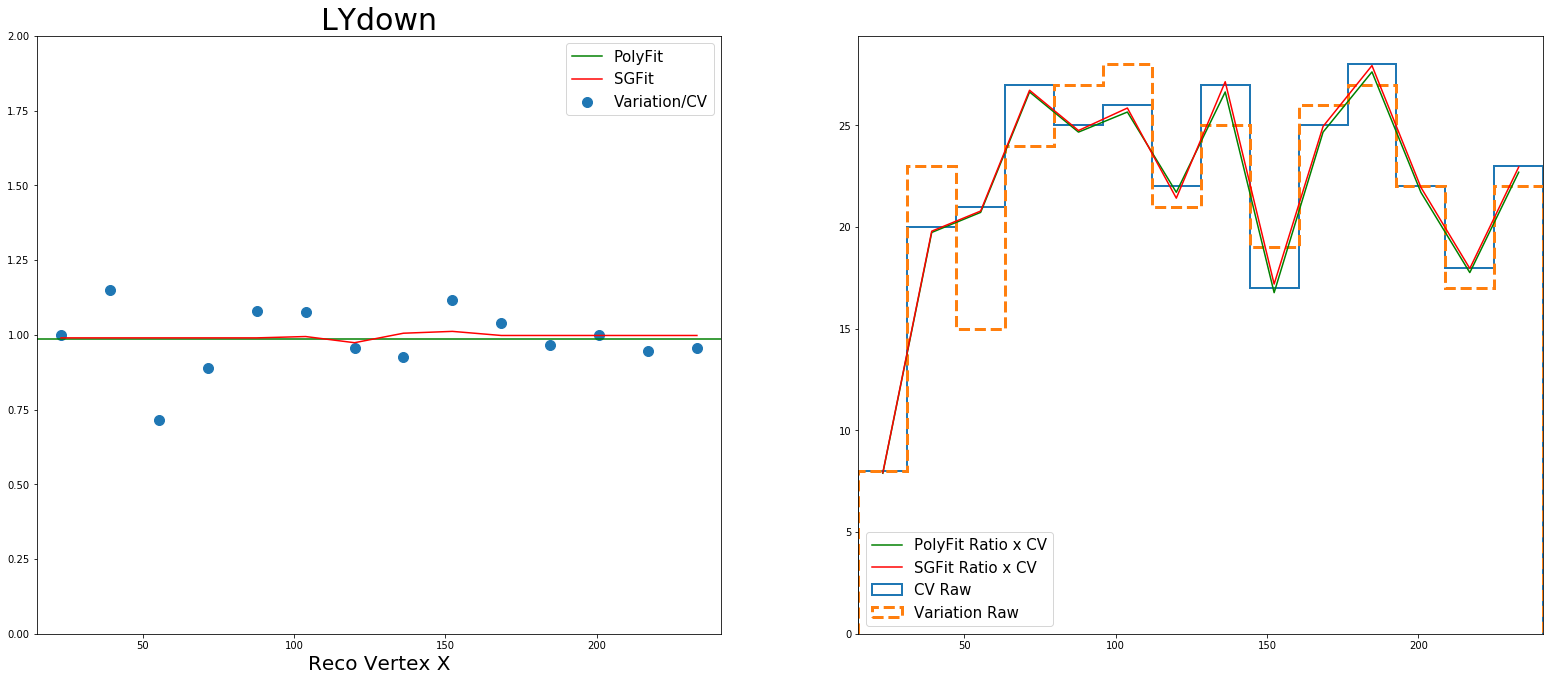

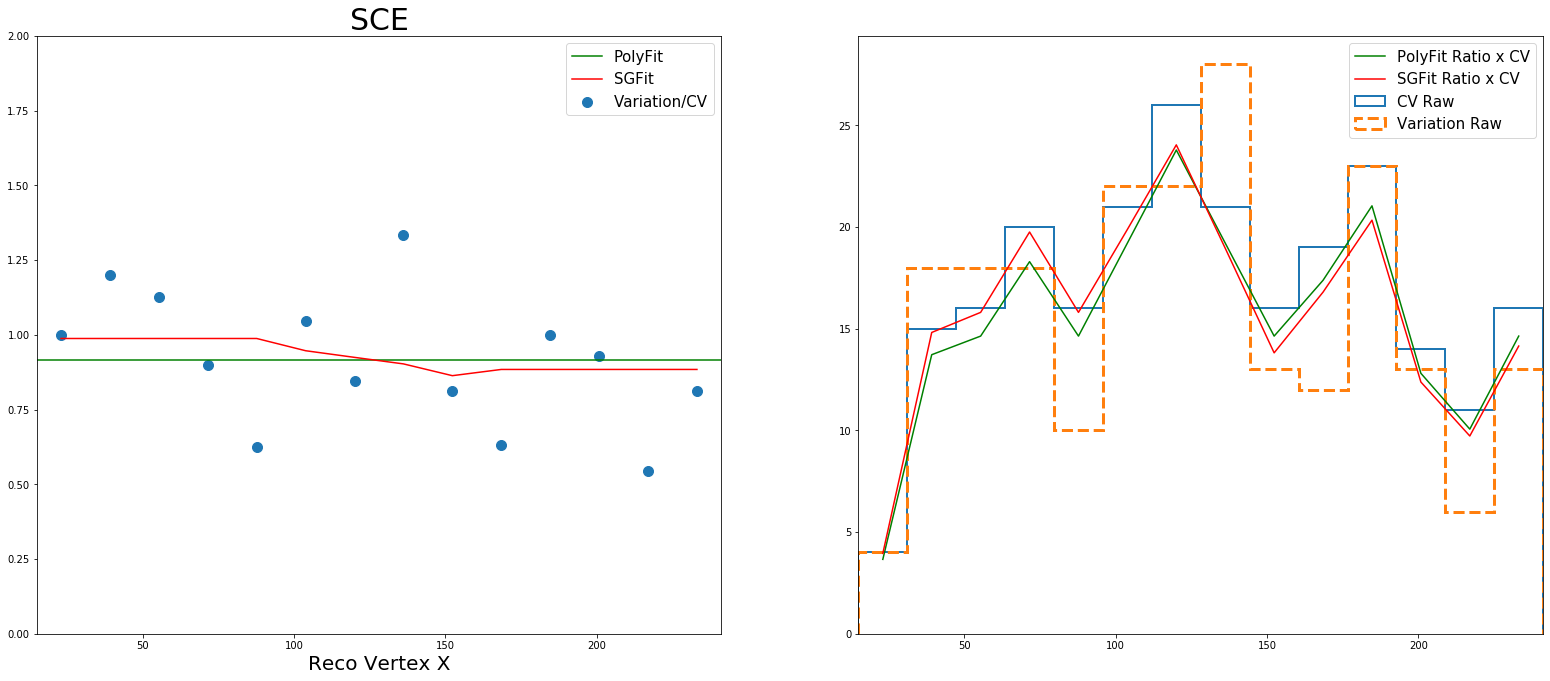

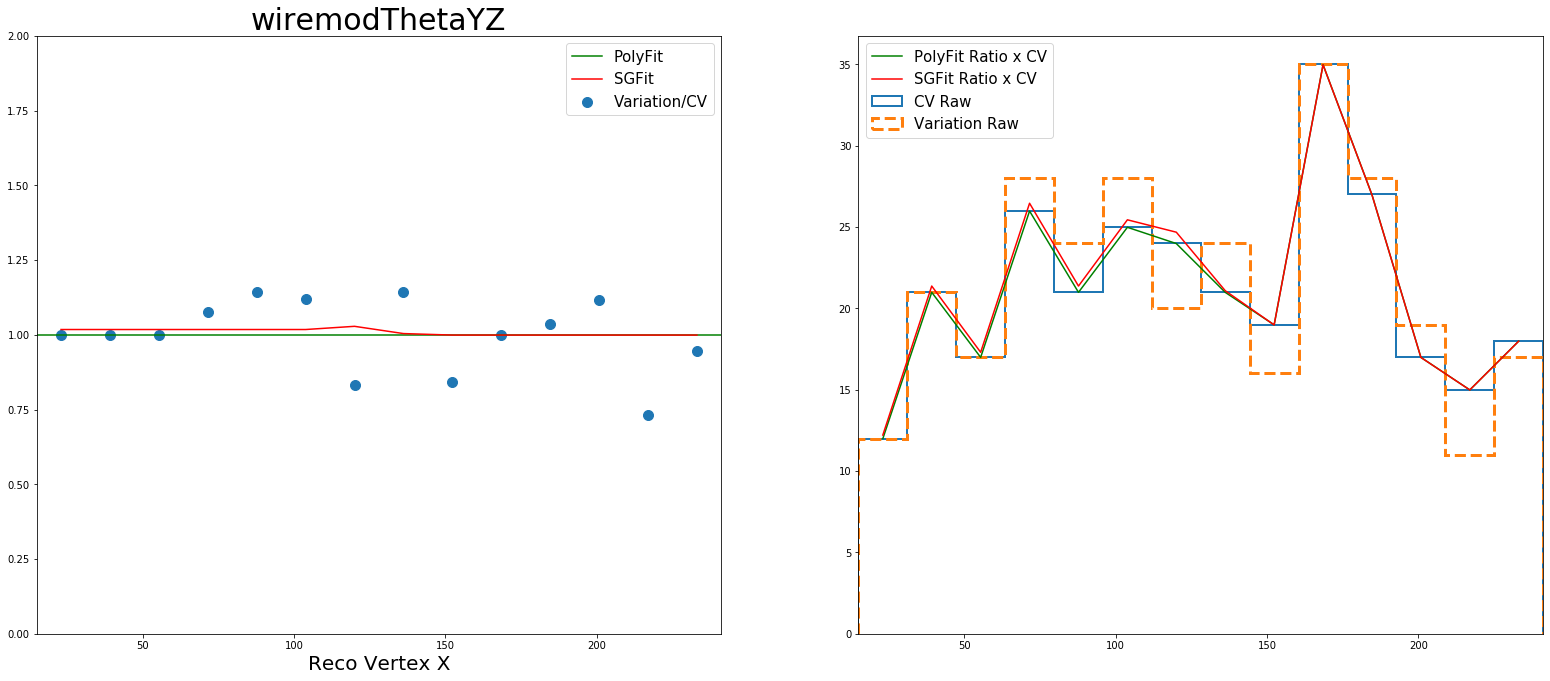

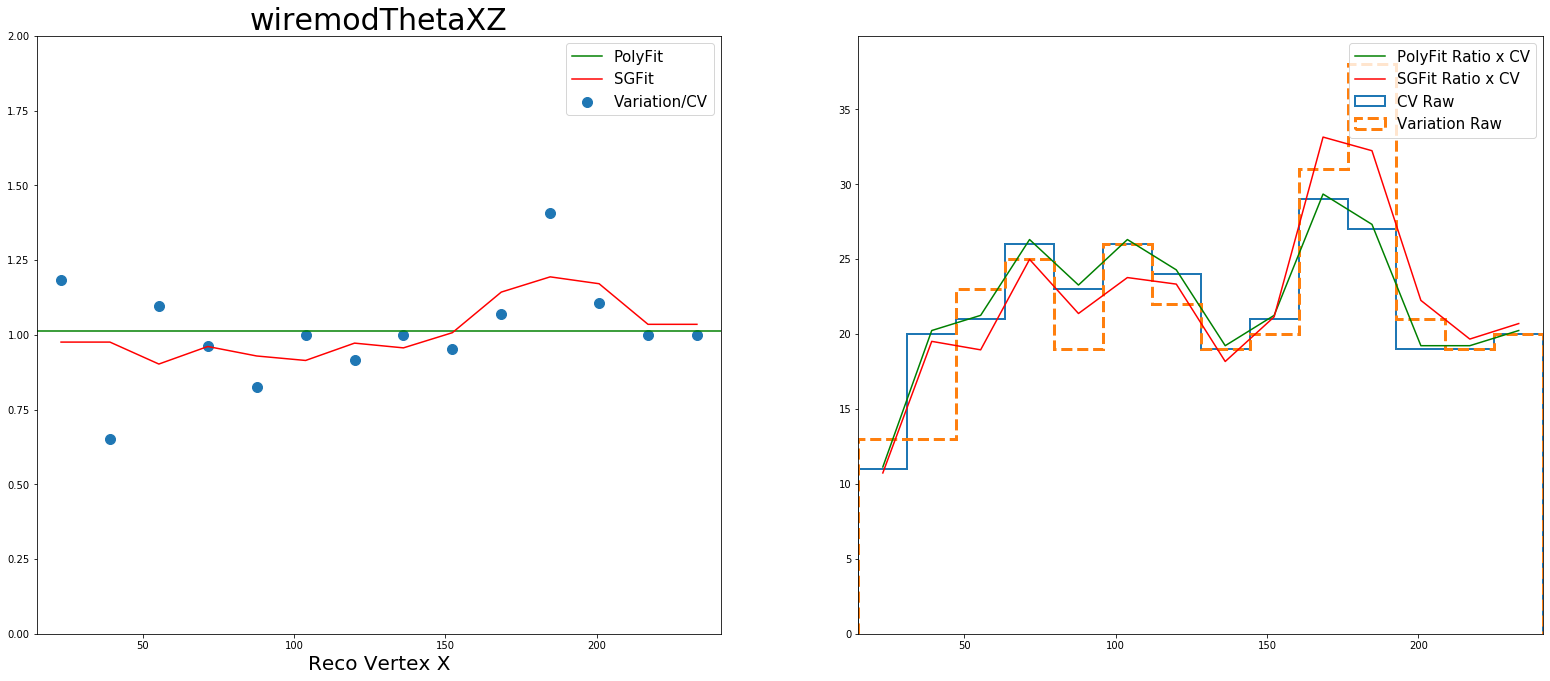

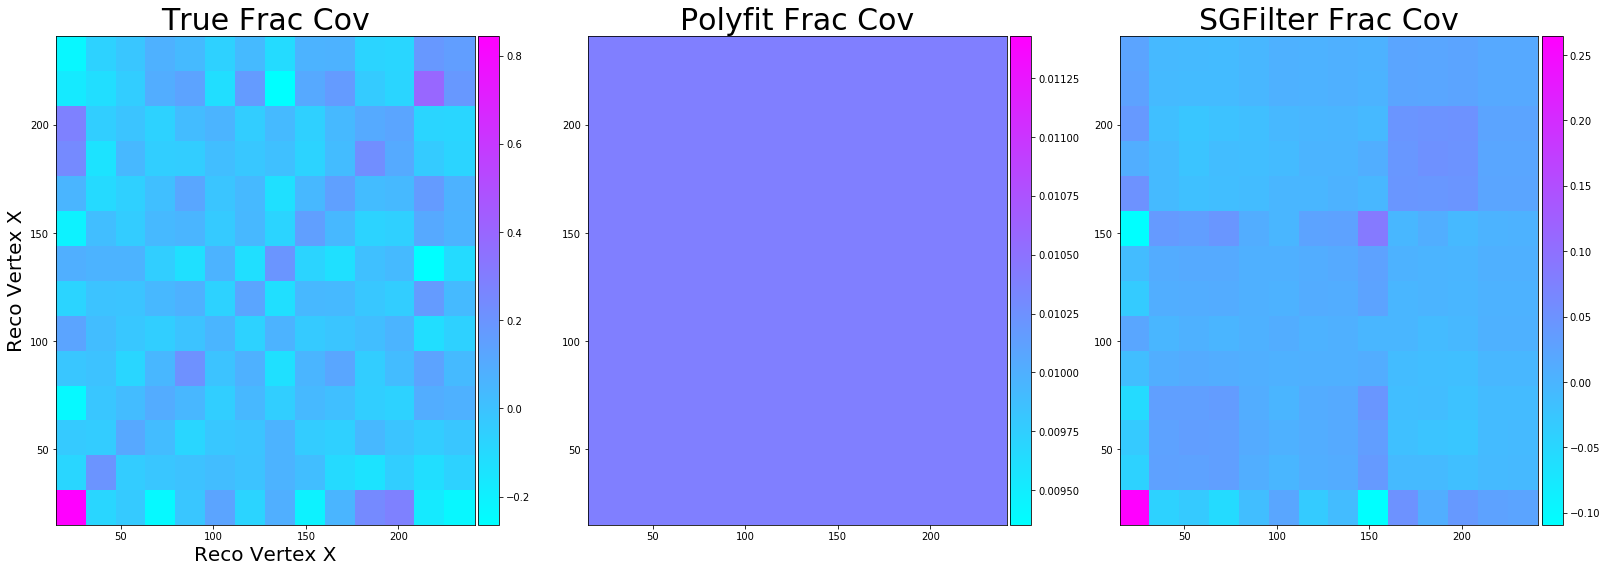

In [153]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov_tru = np.zeros((nbins,nbins))
cov_poly = np.zeros((nbins,nbins))
cov_sg = np.zeros((nbins,nbins))
flatsys = 0.0

for sysi in range(len(a_df_sys)):
    print(s_detsyslist[sysi])
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
          
    hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
    h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
    bincenters = np.diff(binedges)/2 + binedges[:-1]

    truRat = np.true_divide(h0,hCV,out=np.ones_like(bincenters),where=hCV!=0)
      
    # get polyfit degs
    aics = []
    degs = []
    for deg in range(min(nbins-2,int(nbins/2))):
        params = deg + 1
        polyRat = np.polyfit(bincenters, truRat, deg)
        fRat = np.poly1d(polyRat)
    
        # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(fRat(bincenters)*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        aics.append(aic)
        degs.append(deg)
      
    polyterms = degs[np.argmin(aics)]
    print('polyfit degrees:',polyterms,aics[np.argmin(aics)])  
    polyRat = np.polyfit(bincenters, np.true_divide(h0,hCV,where=hCV!=0), polyterms)
    fRat = np.poly1d(polyRat) 
    h0_fit = fRat(bincenters)*hCV
    
    # get sg degs
    aics = []
    degs = []
    wls = []
    for window_length in range(1,nbins-1,2):
        for deg in range(window_length):   
            params = deg + 1
            sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, deg)
            
            # now calculate chi2 for fit
            yerr_rat = np.true_divide(np.sqrt(sgRat*hCV),hCV,out=np.zeros_like(bincenters),where=hCV!=0)
             
            chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat,out=np.zeros_like(bincenters),where=yerr_rat!=0),2).sum()
            aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
            aics.append(aic)
            degs.append(deg)
            wls.append(window_length)
           
    #Savitsky Golay
    window_length = wls[np.argmin(aics)]
    little_poly_t = degs[np.argmin(aics)]
    print('sg window_length',window_length,'degrees:',deg,aics[np.argmin(aics)])
    sgRat = signal.savgol_filter(np.true_divide(h0,hCV,where=hCV!=0), window_length, little_poly_t)
    h0_sgfit = sgRat*hCV
        
    fig,ax = plt.subplots(figsize=(27,11))    
    gs = gridspec.GridSpec(1, 2)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    
    dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
    ax0.scatter(bincenters,np.true_divide(h0,hCV,where=hCV!=0),label='Variation/CV',s=100)
    ax0.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit',color='green')
    ax0.plot(bincenters,sgRat,label='SGFit',color='red')
    
    ax0.set_title(s_detsyslist[sysi],fontsize=30)
    ax0.set_xlabel(dvar.mylabel,fontsize=20)
    ax0.legend(fontsize=15)
    
    ax1.hist(var_cv,nbins,range=dvar.myrange,histtype='step',linewidth=2,label='CV Raw')
    ax1.hist(var_sys,nbins,range=dvar.myrange,histtype='step',linewidth=3,linestyle='--',label='Variation Raw')
    ax1.plot(bincenters,h0_fit,label='PolyFit Ratio x CV',c='green')
    ax1.plot(bincenters,h0_sgfit,label='SGFit Ratio x CV',c='red')
    ax1.legend(fontsize=15)
    ax1.set_xlim(dvar.myrange)
    
    for i in range(nbins):
        for j in range(nbins):
            cov_tru[i][j] += (h0[i]-hCV[i])*(h0[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_poly[i][j] += (h0_fit[i]-hCV[i])*(h0_fit[j]-hCV[j])/(hCV[i]*hCV[j])
            cov_sg[i][j] += (h0_sgfit[i]-hCV[i])*(h0_sgfit[j]-hCV[j])/(hCV[i]*hCV[j])
    flatsys += np.power(h0.sum()-hCV.sum(),2)/float(h0.sum()*hCV.sum())
    
    ax0.set_xlim(dvar.myrange)
    ax0.set_ylim(0,2)
    
fig,ax = plt.subplots(figsize=(27,9))
gs = gridspec.GridSpec(1, 3)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])

X, Y = np.meshgrid(binedges,binedges)

crat_tru = ax0.pcolormesh(X, Y,cov_tru,cmap='cool')#,vmin=-2,vmax=3)
crat_poly = ax1.pcolormesh(X, Y,cov_poly,cmap='cool')#,vmin=-2,vmax=3)
crat_sg = ax2.pcolormesh(X, Y,cov_sg,cmap='cool')#,vmin=-2,vmax=3)

divider0 = make_axes_locatable(ax0)
divider1 = make_axes_locatable(ax1)
divider2 = make_axes_locatable(ax2)

cax0 = divider0.append_axes('right', size='5%', pad=0.05)
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)

cbar = fig.colorbar(crat_tru,cax0)
cbar = fig.colorbar(crat_poly,cax1)
cbar = fig.colorbar(crat_sg,cax2)

ax0.set_title('True Frac Cov',fontsize=30)
ax1.set_title('Polyfit Frac Cov',fontsize=30)
ax2.set_title('SGFilter Frac Cov',fontsize=30)

ax0.set_ylabel(dvar.mylabel,fontsize=20)
ax0.set_xlabel(dvar.mylabel,fontsize=20)

print('flat sys:',np.sqrt(flatsys),flatsys)
np.savetxt('/home/dcianci/Downloads/detsys_%s_nom_cov.csv'%dvar.myname,cov_tru,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_polyfit_cov.csv'%dvar.myname,cov_poly,delimiter=',')
np.savetxt('/home/dcianci/Downloads/detsys_%s_sg_cov.csv'%dvar.myname,cov_sg,delimiter=',')

cov_flat = np.zeros((nbins,nbins))
for i in range(nbins):
    cov_flat[i][i] = flatsys
np.savetxt('/home/dcianci/Downloads/detsys_%s_flat_cov.csv'%dvar.myname,cov_flat,delimiter=',')


## Let's find a good fit

testneg,testzero: [3.57341932 5.14984534 4.6486157  5.42841363 4.85532075 5.14984534
 5.2443458  4.43228117 4.3200533  5.77898761 5.69336824 4.6486157
 4.43228117 4.3200533 ] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 0 chi2: 4.858361287099476 AIC: 7.191694620432809
testneg,testzero: [3.58460323 5.16348664 4.65869297 5.43756843 4.86117103 5.1535693
 5.24561031 4.43121234 4.31692725 5.77201615 5.68375055 4.63851669
 4.42050956 4.30649029] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 1 chi2: 4.85521127016807 AIC: 9.94612036107716
testneg,testzero: [3.5606019  5.14488139 4.6538984  5.44316405 4.87367964 5.17214315
 5.2672318  4.44949474 4.33253077 5.7869404  5.6896391  4.63370125
 4.40441123 4.27729037] [13 27 22 30 24 27 28 20 19 34 33 22 20 19]
degree: 2 chi2: 4.8453018282503555 AIC: 13.245301828250357
testneg,testzero: [3.59961408 5.14921655 4.6303984  5.4024315  4.83840441 5.14579844
 5.25763767 4.45759211 4.35454975 5.82872384 5.7321843  4.6571843
 4.40065667 4.229296

/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/dcianci/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


(0, 2)

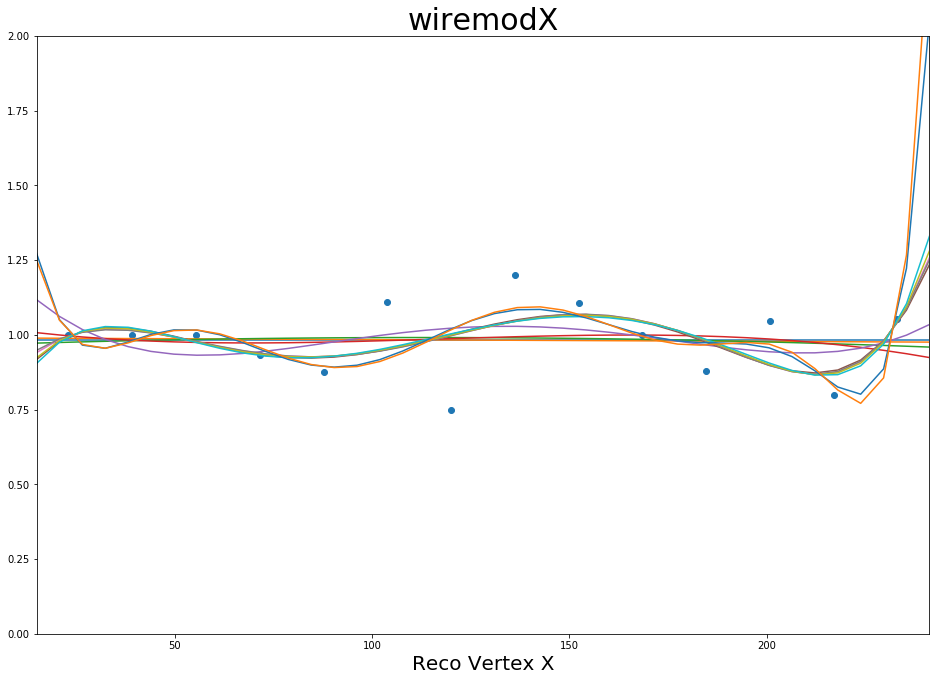

In [117]:
# The same thing with ratios

dvar = varListSel['Xreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
aics = []
degs = []
for deg in range(nbins-2):
        
    params = deg + 1
    polyRat = np.polyfit(bincenters, truRat, deg)
    fRat = np.poly1d(polyRat)
    h0_fit = fRat(bincenters)*hCV
    
    # now calculate chi2 for fit
    print('testneg,testzero:',np.sqrt(h0_fit),hCV)
    yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
    chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
    aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
    print('degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
    plt.plot(dvarLinspace,fRat(dvarLinspace),label='PolyFit (%i)'%polyterms)
    aics.append(aic)
    degs.append(deg)
    

print(degs[np.argmin(aics)])

ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)


window_length 1 degree: 0 chi2: 9.263592560412054 AIC: 11.596925893745388
window_length 3 degree: 0 chi2: 8.873041047947478 AIC: 11.206374381280812
window_length 3 degree: 1 chi2: 8.625229458693235 AIC: 13.716138549602327
window_length 3 degree: 2 chi2: 9.26359256041205 AIC: 17.66359256041205
window_length 5 degree: 0 chi2: 8.878586485910798 AIC: 11.211919819244132
window_length 5 degree: 1 chi2: 8.618203262808063 AIC: 13.709112353717153
window_length 5 degree: 2 chi2: 8.762149528124052 AIC: 17.16214952812405
window_length 5 degree: 3 chi2: 8.827626905939193 AIC: 21.272071350383634
window_length 5 degree: 4 chi2: 9.26359256041205 AIC: 26.76359256041205
window_length 7 degree: 0 chi2: 8.958226898628284 AIC: 11.291560231961618
window_length 7 degree: 1 chi2: 8.568924482314452 AIC: 13.659833573223544
window_length 7 degree: 2 chi2: 8.704847251526996 AIC: 17.104847251526994
window_length 7 degree: 3 chi2: 8.82672819886712 AIC: 21.271172643311566
window_length 7 degree: 4 chi2: 8.8252614464

(0, 2)

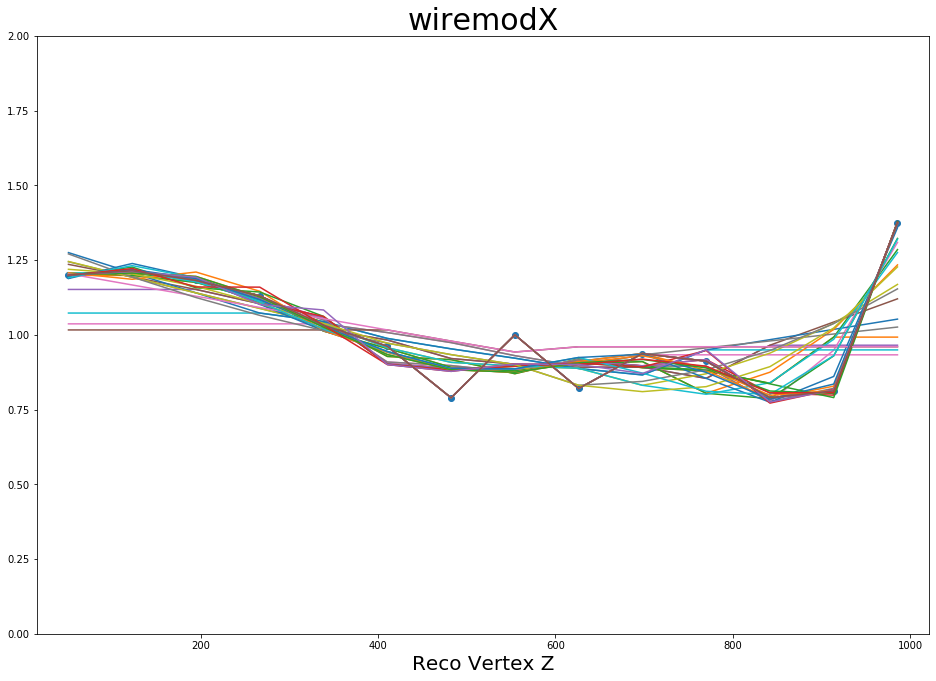

In [77]:
# The same thing with ratios

dvar = varListSel['Zreco']
nbins = 14
cov = np.zeros((nbins,nbins))
flatsys = 0.0

sysi = 0

myvardf = a_overlap_sys[sysi].query(s_cuts)
myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
var_sys = myvardf[dvar.myname]
var_cv = myvarcv[dvar.myname+'_cv']
          
hCV,binedges = np.histogram(var_cv,bins=nbins,range=dvar.myrange)
h0,_ = np.histogram(var_sys,bins=nbins,range=dvar.myrange)
bincenters = np.diff(binedges)/2 + binedges[:-1]
truRat = np.true_divide(h0,hCV)

fig,ax = plt.subplots(figsize=(16,11))    
dvarLinspace = np.linspace(dvar.myrange[0],dvar.myrange[1],40)
plt.scatter(bincenters,np.true_divide(h0,hCV),label='Variation/CV')

# polyfit
for window_length in range(1,nbins-1,2):
    for deg in range(window_length):
        
        params = deg + 1
        sgRat = signal.savgol_filter(np.true_divide(h0,hCV), window_length, deg)
        h0_fit = sgRat*hCV
     
         # now calculate chi2 for fit
        yerr_rat = np.true_divide(np.sqrt(h0_fit),hCV)
        chi2_fit = np.power(np.true_divide(fRat(bincenters)-truRat,yerr_rat),2).sum()
        aic = chi2_fit + 2*params + 2*params*(params+1)/float(nbins-params-1)
        print('window_length',window_length,'degree:',deg,'chi2:',chi2_fit,'AIC:',aic)
        plt.plot(bincenters,sgRat,label='Sigfit (%i)'%polyterms)
    
ax.set_title(s_detsyslist[sysi],fontsize=30)
ax.set_xlabel(dvar.mylabel,fontsize=20)
#ax.legend(fontsize=15)
      
ax.set_xlim(dvar.myrange)
ax.set_ylim(0,2)

In [ ]:


if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i].query(s_cuts)[dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%i)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv.query(s_cuts)[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%i)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)       
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax1.set_ylim(0,2.5)
    ax0.legend(fontsize=15)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

## Smearing

In [51]:
dumphole = 'DetSysSmear'
dumpfolder = '../PlotDumps'

dumphole = '%s/%s'%(dumpfolder,dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)
if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:

    fig,ax = plt.subplots(figsize=(16,11))
    binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
    myrange = (-3*binwidth,3*binwidth)
    nbins = 15

    for sysi in range(len(a_df_sys)):
        myvardf = a_overlap_sys[sysi].query(s_cuts)
        myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
        var_sys = myvardf[dvar.myname]
        var_cv = myvarcv[dvar.myname+'_cv']
        
        h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3) 
    
    ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
    ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
    ax.set_title('(CV - Detsys)',fontsize=30)
    ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
    ax.legend(fontsize=25)
    plt.savefig(dumphole+'/'+dvar.myname+'.png')
    plt.close(fig)
    

NameError: name 'varlistSel' is not defined

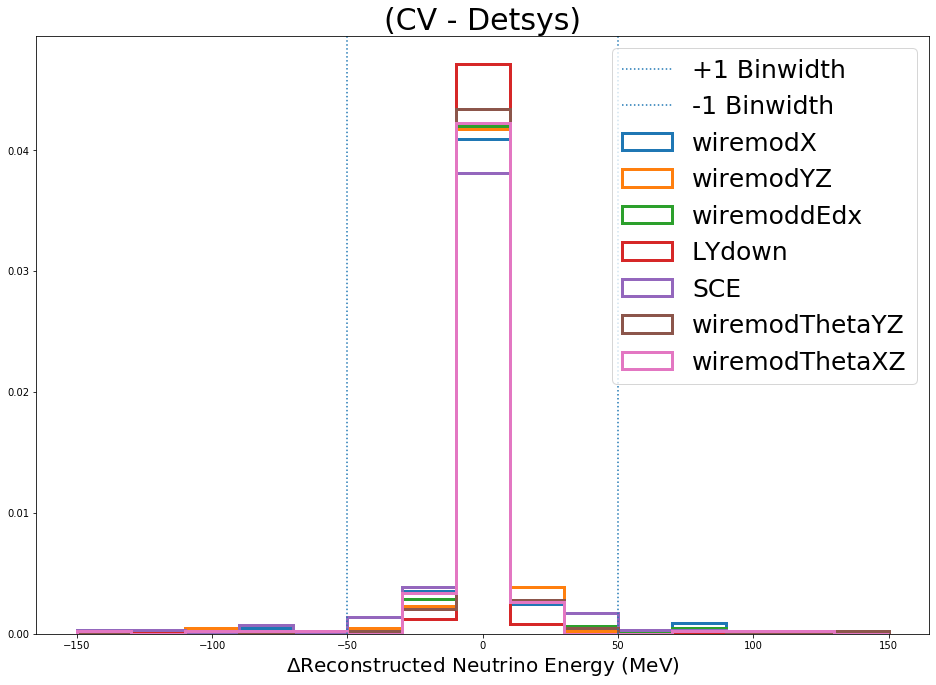

In [150]:
dvar = varListSel['Enu_1m1p']

fig,ax = plt.subplots(figsize=(16,11))
binwidth = (dvar.myrange[1]-dvar.myrange[0])/float(14)
myrange = (-3*binwidth,3*binwidth)
nbins = 15

for sysi in range(len(a_df_sys)):
    myvardf = a_overlap_sys[sysi].query(s_cuts)
    myvarcv = a_cv_sys[sysi].query(s_cuts_cv)
        
    var_sys = myvardf[dvar.myname]
    var_cv = myvarcv[dvar.myname+'_cv']
        
    h0,binedges,_ = plt.hist((var_cv-var_sys),bins=nbins,range=myrange,histtype='step',label=s_detsyslist[sysi],linewidth=3,density=1) 
    
ax.axvline(binwidth,label='+1 Binwidth',linestyle=':')
ax.axvline(-binwidth,label='-1 Binwidth',linestyle=':')
ax.set_title('(CV - Detsys)',fontsize=30)
ax.set_xlabel(r'$\Delta$'+dvar.mylabel,fontsize=20)
ax.legend(fontsize=25)

## Extras

In [83]:
dumpbins = 18
dumphole = '/home/dcianci/Downloads/detsys_may18_presel' # where are we dumping these?

if not os.path.exists(dumphole):
    os.makedirs(dumphole)

for dist in varlistSel:
    
    fig,ax = plt.subplots(figsize=(16,11))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, .75])
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    hSys =  []
    
    for i in range(len(s_detsyslist)):
        var_sys = a_df_sys[i][dist.myname]
        sys_scale = np.ones(len(var_sys))*totalscale/f_scaleslist[i]
        h0,_ = np.histogram(var_sys,range=dist.myrange,bins=dumpbins,weights=sys_scale)
        h1,_,_ = ax0.hist(var_sys,range=dist.myrange,bins=dumpbins,histtype='step',label=s_detsyslist[i]+' (%.4f)'%h0.sum(),linewidth=2,weights=sys_scale)
        hSys.append(h1)
    
    var_cv = df_cv[dist.myname]
    cv_scale = np.ones(len(var_cv))*totalscale/scaleCV
    h0,_ = np.histogram(var_cv,range=dist.myrange,bins=dumpbins,weights=cv_scale)
    hCV,binedges,_ = ax0.hist(var_cv,range=dist.myrange,bins=dumpbins,histtype='step',label='CV (%.4f)'%h0.sum(),linewidth=3,color='black',linestyle='--',weights=cv_scale)
    
    ax0.set_ylabel('Events in 5e19 POT',fontsize=20)
    ax0.set_xlabel(dist.mylabel,fontsize=25)
    ax0.set_title('BNB Overlay w/ Detsys',fontsize=15)
    ax0.set_xlim(dist.myrange)
    ax1.set_xlim(dist.myrange)
    ax0.legend(fontsize=15)
    ax1.set_ylim(0,2.5)
    
    for i in range(len(hSys)):
        ydots = np.true_divide(hSys[i],hCV,where=hCV!=0)
        xdots = binedges[:-1] + (binedges[1]-binedges[0])/float(len(hSys)) * i
        ax1.scatter(xdots,ydots)
    
    ax1.axhline(1,linestyle=':',color='maroon')
    
    for j in range(len(hCV)):
        ax1.axvline(binedges[j+1],linestyle=':',color='gray') 
    
    plt.savefig(dumphole+'/'+dist.myname+'.png')
    plt.close(fig)

/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dcianci/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
